In [1]:
import pandas
import matplotlib.pyplot as plt
import seaborn as sns
import numpy
import scipy

plt.rcParams.update({'font.size': 16})

In [2]:
df = pandas.read_csv('submission-fixed-nb_processed.csv')
df.head()

fileNames language  \
0  dce6111ca85bec288f66abf073b05f1e765d88c7.ipynb  python3   
1  34764addd2e5b1aa62939bd6678decf7d3e705df.ipynb  python3   
2  d65342252111a9ee979858081d7d21639064bc54.ipynb  python3   
3  f83b551ea97932e38017db3540484525bf0daa05.ipynb  python3   
4  2eabdde2de2e4a1f834e4073ef6b408bfb8ed722.ipynb  python3   

                                             imports  num_images  \
0  [" requests", "bs4 BeautifulSoup", " os", "slu...           0   
1  ["google.colab drive", " numpy", " pandas", " ...          18   
2  [" matplotlib.pyplot", "skimage color", "skima...           2   
3  [" dicom", " SimpleITK", " numpy", " array", "...          14   
4  [" matplotlib", " matplotlib.pyplot", " numpy"...           0   

                                      image_metadata  has_matplotlib  \
0                                                 []               0   
1  ["text/html", "text/plain", "text/plain", "tex...               2   
2                        ["image/png", "text/plain"]               0   
3  ["text/html", "text/vnd.plotly.v1+html", "appl...               0   
4                                                 []               0   

   has_plotly  has_bokeh                                         code_lines  \
0           0          0            [3, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1]   
1           0          1  [1, 1, 5, 2, 3, 3, 3, 3, 2, 2, 1, 2, 5, 2, 1, ...   
2           0          1                                      [4, 2, 22, 1]   
3           0          0                             [22, 3, 13, 26, 33, 1]   
4           0          0                   [18, 8, 8, 10, 18, 27, 1, 79, 1]   

   total_code_lines                                     markdown_lines  \
0                15                           [2, 2, 2, 2, 2, 2, 2, 2]   
1               211  [2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, ...   
2                29                                                 []   
3                98                                                 []   
4               170                                                 []   

   sum_markdown_lines  
0                  16  
1                  62  
2                   0  
3                   0  
4                   0

In [3]:
df = df.dropna()
pydf = df[df['language'].str.contains('py')]
pydf['num_images'].sum()

1583260

In [4]:
import json

result = {}
for index, row in pydf.iterrows():
    metadata = json.loads(row['image_metadata'])
    for m in metadata:
        if m not in result:
            result[m] = 0
        result[m] = result[m] + 1

rdf_data = [[k.split('/')[0], k.split('/')[1], v] for k, v in result.items() if '/' in k]
rdf = pandas.DataFrame(data=rdf_data, columns=['Category', 'Type', 'Total'])

In [5]:
rdf = rdf.sort_values(by=['Category', 'Total'], ascending=[True, False])
rdf

Category                                       Type   Total
9   application                                 javascript   22842
4   application               vnd.jupyter.widget-view+json   14532
5   application                         vnd.plotly.v1+json    3385
12  application                   vnd.bokehjs_exec.v0+json     902
16  application                                        pdf     677
26  application                               vdom.v1+json     330
11  application                   vnd.bokehjs_load.v0+json     326
32  application                      papermill.record+json     300
13  application                 vnd.holoviews_load.v0+json     157
17  application                 vnd.holoviews_exec.v0+json     122
18  application                                       json      93
7   application     vnd.google.colaboratory.intrinsic+json      77
14  application                vnd.colab-display-data+json      68
21  application          vnd.google.colaboratory.intrinsic      57
24  application                       vnd.vegalite.v3+json      45
22  application                       vnd.vegalite.v2+json      23
23  application  vnd.google.colaboratory.module+javascript      16
29  application                       vnd.vegalite.v1+json      11
19  application                            3dmoljs_load.v0       5
25  application                         aml.mini.widget.v1       5
28  application                       unittest.status+json       4
27  application                  scrapbook.scrap.text+json       1
31  application                      vnd.vega.ibis.v5+json       1
33  application                                   geo+json       1
2         image                                        png  339589
10        image                                    svg+xml    3854
8         image                                       jpeg    1326
20        image                                        gif      19
1          text                                      plain  977328
0          text                                       html  208170
6          text                                   markdown    4750
15         text                                      latex    2606
3          text                         vnd.plotly.v1+html    1623
30         text                               vnd.graphviz      10

In [6]:
rdf = rdf.sort_values(by=['Total'], ascending=False)
x = rdf['Total'].sum()
rdf['Percentage'] = rdf['Total'] / x * 100.0
rdf['CumSum'] = rdf['Percentage'].cumsum()
rdf

Category                                       Type   Total  \
1          text                                      plain  977328   
2         image                                        png  339589   
0          text                                       html  208170   
9   application                                 javascript   22842   
4   application               vnd.jupyter.widget-view+json   14532   
6          text                                   markdown    4750   
10        image                                    svg+xml    3854   
5   application                         vnd.plotly.v1+json    3385   
15         text                                      latex    2606   
3          text                         vnd.plotly.v1+html    1623   
8         image                                       jpeg    1326   
12  application                   vnd.bokehjs_exec.v0+json     902   
16  application                                        pdf     677   
26  application                               vdom.v1+json     330   
11  application                   vnd.bokehjs_load.v0+json     326   
32  application                      papermill.record+json     300   
13  application                 vnd.holoviews_load.v0+json     157   
17  application                 vnd.holoviews_exec.v0+json     122   
18  application                                       json      93   
7   application     vnd.google.colaboratory.intrinsic+json      77   
14  application                vnd.colab-display-data+json      68   
21  application          vnd.google.colaboratory.intrinsic      57   
24  application                       vnd.vegalite.v3+json      45   
22  application                       vnd.vegalite.v2+json      23   
20        image                                        gif      19   
23  application  vnd.google.colaboratory.module+javascript      16   
29  application                       vnd.vegalite.v1+json      11   
30         text                               vnd.graphviz      10   
25  application                         aml.mini.widget.v1       5   
19  application                            3dmoljs_load.v0       5   
28  application                       unittest.status+json       4   
33  application                                   geo+json       1   
31  application                      vnd.vega.ibis.v5+json       1   
27  application                  scrapbook.scrap.text+json       1   

    Percentage      CumSum  
1    61.729033   61.729033  
2    21.448787   83.177820  
0    13.148229   96.326050  
9     1.442724   97.768774  
4     0.917856   98.686630  
6     0.300015   98.986645  
10    0.243423   99.230067  
5     0.213800   99.443867  
15    0.164598   99.608465  
3     0.102510   99.710975  
8     0.083752   99.794727  
12    0.056971   99.851698  
16    0.042760   99.894458  
26    0.020843   99.915301  
11    0.020590   99.935892  
32    0.018948   99.954840  
13    0.009916   99.964756  
17    0.007706   99.972462  
18    0.005874   99.978336  
7     0.004863   99.983199  
14    0.004295   99.987494  
21    0.003600   99.991094  
24    0.002842   99.993937  
22    0.001453   99.995389  
20    0.001200   99.996589  
23    0.001011   99.997600  
29    0.000695   99.998295  
30    0.000632   99.998926  
25    0.000316   99.999242  
19    0.000316   99.999558  
28    0.000253   99.999811  
33    0.000063   99.999874  
31    0.000063   99.999937  
27    0.000063  100.000000

In [7]:
x

1583255

In [8]:
rdf['Category'].value_counts()

application    24
text            6
image           4
Name: Category, dtype: int64

# Distribution of code and markdown lines in Notebooks

In [9]:
data = []
for index, row in df.iterrows():
    filename = row['fileNames']
    code_lines = row['total_code_lines']
    markdown_lines = row['sum_markdown_lines']
    data.append([filename, code_lines, markdown_lines])

datadf = pandas.DataFrame(data=data, columns=['Filename', 'Total Lines of Code', 'Total Lines of Markdown'])
datadf = datadf.sort_values(by=['Total Lines of Code'], ascending=True)

total_lines_of_code = datadf['Total Lines of Code'].sum()
datadf['cdf-lines-of-code'] = datadf['Total Lines of Code'].cumsum() / total_lines_of_code
Y_cdf_lines_of_code = datadf['cdf-lines-of-code'].tolist()
X_cdf_lines_of_code = datadf['Total Lines of Code'].tolist()

datadf = datadf.sort_values(by=['Total Lines of Markdown'], ascending=True)
total_lines_of_markdown = datadf['Total Lines of Markdown'].sum()
datadf['cdf-lines-of-markdown'] = datadf['Total Lines of Markdown'].cumsum() / total_lines_of_markdown
Y_cdf_lines_of_markdown = datadf['cdf-lines-of-markdown'].tolist()
X_cdf_lines_of_markdown = datadf['Total Lines of Markdown'].tolist()

print('Number of Lines of Code')
print(datadf['Total Lines of Code'].describe())
print('Number of Lines of Markdown')
print(datadf['Total Lines of Markdown'].describe())

Number of Lines of Code
count    96766.000000
mean       140.758252
std        264.286860
min          0.000000
25%         32.000000
50%         80.000000
75%        177.000000
max      39428.000000
Name: Total Lines of Code, dtype: float64
Number of Lines of Markdown
count    96766.000000
mean        18.843788
std         30.426901
min          0.000000
25%          0.000000
50%          8.000000
75%         24.000000
max        874.000000
Name: Total Lines of Markdown, dtype: float64


In [10]:
datadf

Filename  Total Lines of Code  \
73703  6578f2d51a169d6309d6c838157052aa6bb79255.ipynb                    0   
50755  5278ab292416108b5d42a31862cd14f14432e08a.ipynb                   58   
37416  b5e70a1759cdf40389b799c954acf6b9694e1e27.ipynb                   58   
93530  c41fa8e83db39331fabc3146a35ebebd5c2e2ea9.ipynb                   58   
46314  bfc03f85e9e7902d62c31aed4c7a70485304df96.ipynb                   58   
...                                               ...                  ...   
52459  1492f02294c3d16669566de223a262f6b9d2b41a.ipynb                 3779   
51925  fcbf8e5a944ebbd9177c8b637edf8c778726d931.ipynb                  346   
50870  dc907bab8ab7493c93ef636ade87a7c1bab0ac66.ipynb                  847   
2083   931568140bb98f0ac04ba663174869aca591240a.ipynb                 1387   
30264  31ea309967da0296ad80eb6147e6cd59c919f202.ipynb                 1407   

       Total Lines of Markdown  cdf-lines-of-code  cdf-lines-of-markdown  
73703                        0           0.000000               0.000000  
50755                        0           0.070263               0.000000  
37416                        0           0.070280               0.000000  
93530                        0           0.070284               0.000000  
46314                        0           0.070297               0.000000  
...                        ...                ...                    ...  
52459                      592           0.985618               0.998490  
51925                      596           0.611050               0.998817  
50870                      634           0.886362               0.999164  
2083                       650           0.947083               0.999521  
30264                      874           0.948007               1.000000  

[96766 rows x 5 columns]

In [11]:
def cdf(data, sort_needed=True):
    n = len(data)
    x = data
    if sort_needed:
        x = numpy.sort(data) # sort your data
    y = numpy.arange(1, n + 1) / n # calculate cumulative probability
    return x, y

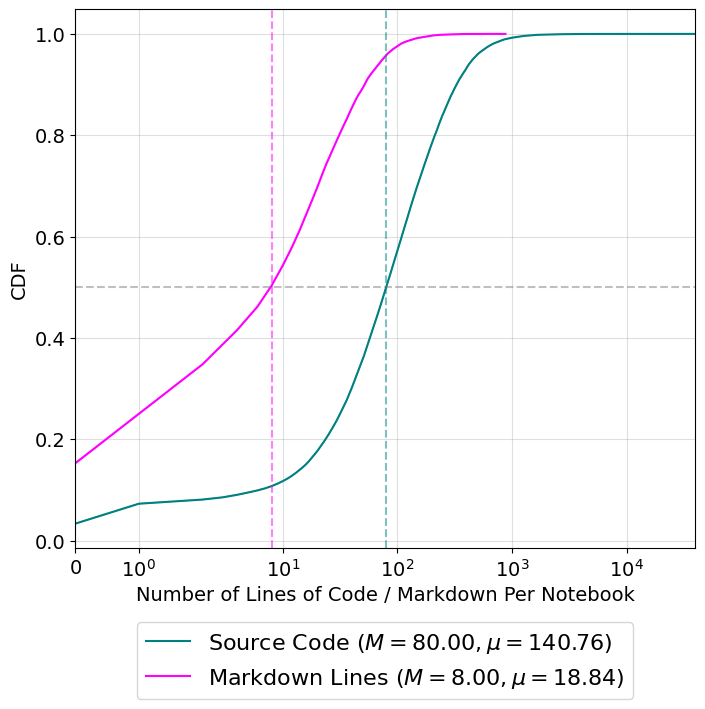

In [68]:
import matplotlib
fig, ax = plt.subplots(nrows=1, ncols=1, figsize=(8, 7))

matplotlib.rcParams.update({'font.size': 16})

datadf = datadf.sort_values(by=['Total Lines of Code'], ascending=True)

lines_of_code, lines_of_code_y = cdf(datadf['Total Lines of Code'].tolist())


datadf = datadf.sort_values(by=['Total Lines of Markdown'], ascending=True)

lines_of_markdown, lines_of_markdown_y = cdf(datadf['Total Lines of Markdown'].tolist())

vline_code_lines = numpy.percentile(lines_of_code, 50.0)
code_lines_mean = numpy.mean(lines_of_code)
vlines_markdown_lines = numpy.percentile(lines_of_markdown, 50.0)
markdown_lines_mean = numpy.mean(lines_of_markdown)

sns.lineplot(x=lines_of_code,
             y=lines_of_code_y,
             label=f'Source Code $(M={vline_code_lines:.2f}, \mu={code_lines_mean:.2f})$',
             color='teal',
             ax=ax)


sns.lineplot(x=lines_of_markdown,
             y=lines_of_markdown_y,
             label=f'Markdown Lines $(M={vlines_markdown_lines:.2f}, \mu={markdown_lines_mean:.2f})$',
             color='magenta',
             ax=ax)

horizontal_line = ax.axhline(y=0.5, linestyle='--', color='gray', alpha=0.5)
ax.axvline(x=vline_code_lines, linestyle='--', color='teal', alpha=0.5)
ax.axvline(x=vlines_markdown_lines, linestyle='--', color='magenta', alpha=0.5)

ax.set_xscale('symlog')
ax.grid(True, alpha=0.4)
ax.set_xlim(0, max(lines_of_code[-1], lines_of_markdown[-1]))
ax.set_xlabel('Number of Lines of Code / Markdown Per Notebook')
ax.set_ylabel('CDF')

ax.legend(bbox_to_anchor=(0.45, -0.3, 0.1, 0.1), loc='lower center')
plt.savefig('submission-figures/code-markdown-lines-distribution.pdf', bbox_inches='tight')

In [13]:
for p in [50, 75, 90, 99, 100]:
    print(f'M [{p}]' ,numpy.percentile(lines_of_markdown, p))
    print(f'C [{p}]', numpy.percentile(lines_of_code, p))

M [50] 8.0
C [50] 80.0
M [75] 24.0
C [75] 177.0
M [90] 52.0
C [90] 328.0
M [99] 140.0
C [99] 889.0
M [100] 874.0
C [100] 39428.0


# Number of rows, columns per table and number of tables

In [14]:
df = pandas.read_csv('nb_processed_cell_html.csv', converters={'_table_metadata': json.loads})
df.head()

fileNames  cell_seq_num  cellType  \
0  serve/light/107d73eda168b7699d80351e4995937d6a...             0  markdown   
1  serve/light/107d73eda168b7699d80351e4995937d6a...             1  markdown   
2  serve/light/107d73eda168b7699d80351e4995937d6a...             2  markdown   
3  serve/light/107d73eda168b7699d80351e4995937d6a...             3  markdown   
4  serve/light/107d73eda168b7699d80351e4995937d6a...             4  markdown   

   _has_output  _no_outputs  _output_contains_graphics  \
0        False        False                      False   
1        False        False                      False   
2        False        False                      False   
3        False        False                      False   
4        False        False                      False   

   _output_contains_tables  _has_interactive  _has_heading  _has_links  ...  \
0                    False             False         False       False  ...   
1                    False             False         False       False  ...   
2                    False             False          True        True  ...   
3                    False             False          True        True  ...   
4                    False             False          True        True  ...   

                                            h1_texts  h2_texts  \
0                                                 []        []   
1                                                 []        []   
2  ["Reinforcement Learning in Azure Machine Lear...        []   
3                                                 []        []   
4                                                 []        []   

               h3_texts  h4_texts  h5_texts  h6_texts  has_tables  has_math  \
0                    []        []        []        []       False     False   
1                    []        []        []        []       False     False   
2                    []        []        []        []       False     False   
3  ["Cartpole problem"]        []        []        []        True     False   
4      ["Prerequisite"]        []        []        []       False     False   

   num_math            alt_text  
0         0                  []  
1         0     ["Impressions"]  
2         0                  []  
3         0  ["Cartpole image"]  
4         0                  []  

[5 rows x 33 columns]

In [15]:
df.columns

Index(['fileNames', 'cell_seq_num', 'cellType', '_has_output', '_no_outputs',
       '_output_contains_graphics', '_output_contains_tables',
       '_has_interactive', '_has_heading', '_has_links', '_has_math_latex',
       '_code_lines', '_has_imports', '_cell_execution_order', '_num_h1',
       '_num_h2', '_num_h3', '_num_h4', '_num_h5', '_num_h6', '_num_tables',
       '_num_links', '_table_metadata', 'h1_texts', 'h2_texts', 'h3_texts',
       'h4_texts', 'h5_texts', 'h6_texts', 'has_tables', 'has_math',
       'num_math', 'alt_text'],
      dtype='object')

In [16]:
def process_r_c_tuples(item):
    s = []
    for d in item:
        s.append((d['num_rows'], d['num_columns']))
    return s

def flatten(arr):
    r = []
    for i in arr:
        for x in i:
            r.append(x)
    return r

In [17]:
import json

df = df[['fileNames', '_num_tables', '_table_metadata', 'has_tables']]

In [18]:
df['table_metadata'] = df['_table_metadata'].apply(lambda x: process_r_c_tuples(x))

In [19]:
gdf = df.groupby(['fileNames']).agg({'table_metadata': lambda x: list(x)})
gdf['table_metadata'] = gdf['table_metadata'].apply(lambda r: flatten(r))
gdf['num_tables'] = gdf['table_metadata'].apply(lambda x: len(x))

In [20]:
gdf

table_metadata  \
fileNames                                                                                               
serve/light/00004ed1e748e9b6366dfba50541fe8b80c...                                          [(6, 20)]   
serve/light/00014130779110127e4663c5bea956ca980...                                [(6, 105), (6, 10)]   
serve/light/00026146546c2e5fac0614046e6ae8ea8b8...                                                 []   
serve/light/000283b0d12ba9459776d6a46b342e42b91...                                                 []   
serve/light/0002bfa1855851337a426100eecacfd5068...  [(5, 12), (5, 8), (5, 12), (3, 6), (9, 24), (7...   
...                                                                                               ...   
serve/light/fffd4c1669082d48e561ce5b1171a554727...                                                 []   
serve/light/fffd885a4df5d69c9f709a216f25a91260e...  [(6, 30), (6, 30), (6, 35), (6, 15), (8, 36), ...   
serve/light/fffe21dde7d18843cef438cd9eb13437deb...                       [(9, 120), (6, 25), (6, 30)]   
serve/light/ffff9715a0a0f36012a670528c86543c54b...                                                 []   
serve/light/ffffc0afae7e08f4610307c61a705e59222...                                                 []   

                                                    num_tables  
fileNames                                                       
serve/light/00004ed1e748e9b6366dfba50541fe8b80c...           1  
serve/light/00014130779110127e4663c5bea956ca980...           2  
serve/light/00026146546c2e5fac0614046e6ae8ea8b8...           0  
serve/light/000283b0d12ba9459776d6a46b342e42b91...           0  
serve/light/0002bfa1855851337a426100eecacfd5068...          13  
...                                                        ...  
serve/light/fffd4c1669082d48e561ce5b1171a554727...           0  
serve/light/fffd885a4df5d69c9f709a216f25a91260e...           7  
serve/light/fffe21dde7d18843cef438cd9eb13437deb...           3  
serve/light/ffff9715a0a0f36012a670528c86543c54b...           0  
serve/light/ffffc0afae7e08f4610307c61a705e59222...           0  

[98222 rows x 2 columns]

count    98222.00000
mean         1.90158
std          8.06090
min          0.00000
25%          0.00000
50%          0.00000
75%          2.00000
max       1181.00000
Name: num_tables, dtype: float64
count    33632.000000
mean         5.553550
std         13.018825
min          1.000000
25%          1.000000
50%          3.000000
75%          6.000000
max       1181.000000
Name: num_tables, dtype: float64


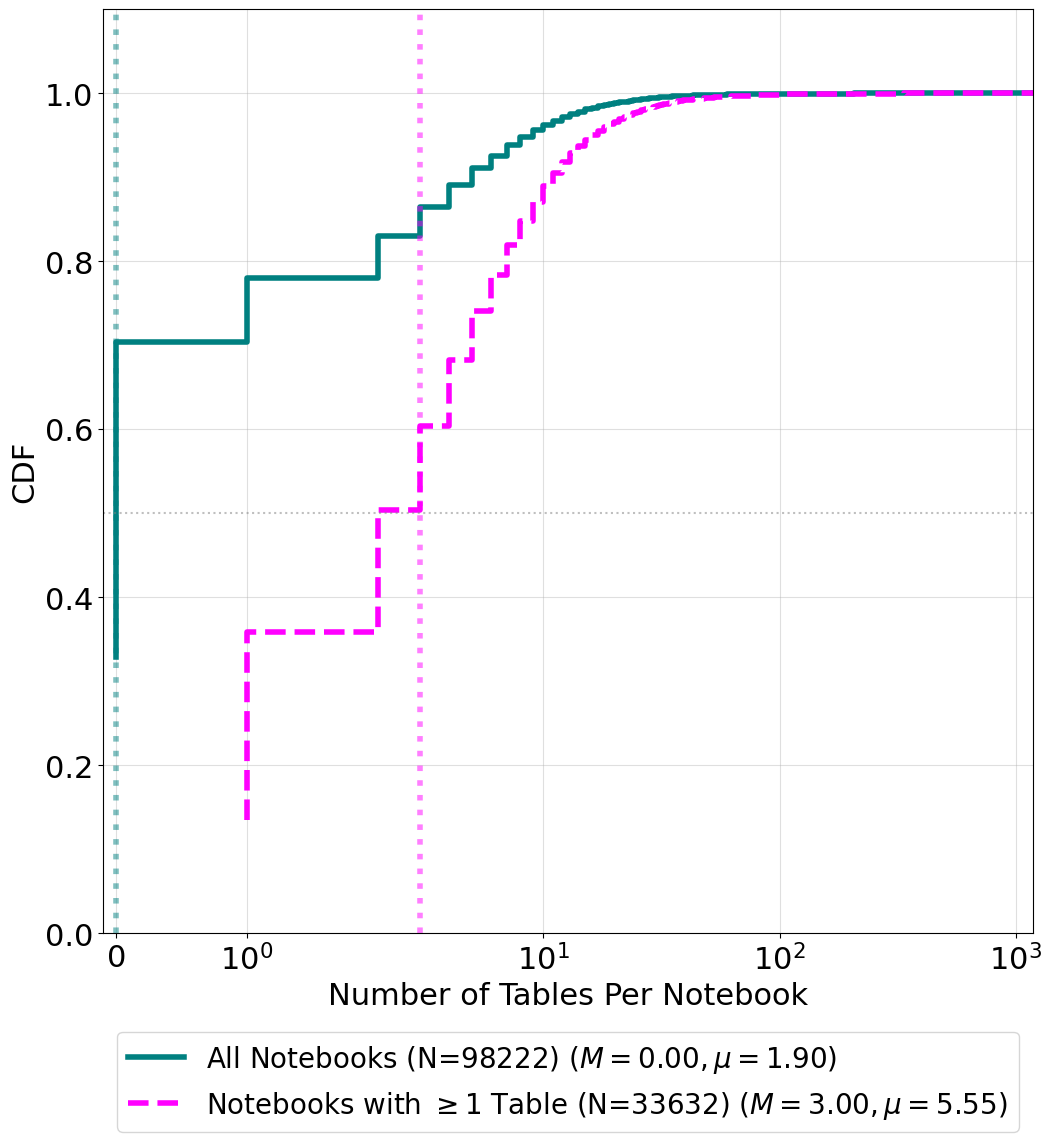

In [113]:
fig, ax = plt.subplots(nrows=1, ncols=1, figsize=(12, 12))

matplotlib.rcParams.update({'font.size': 20})

num_tables_x, num_tables_y = cdf(gdf['num_tables'].tolist())
median_tables_all = numpy.median(num_tables_x)
mean_tables_all = numpy.mean(num_tables_x)

sns.lineplot(x=num_tables_x, y=num_tables_y,
             ax=ax, drawstyle='steps-pre',
             errorbar=None,
             linewidth=4,
             linestyle='-',
             color='teal',
             label=f'All Notebooks (N={gdf.shape[0]}) $(M={median_tables_all:.2f},\mu={mean_tables_all:.2f})$')

gdf_nozero = gdf[gdf['num_tables'] > 0]
num_tables_nozero_x, num_tables_nozero_y = cdf(gdf_nozero['num_tables'].tolist())
median_tables_nozero = numpy.median(num_tables_nozero_x)
mean_tables_nozero = numpy.mean(num_tables_nozero_x)

print(gdf['num_tables'].describe())
print(gdf_nozero['num_tables'].describe())

sns.lineplot(x=num_tables_nozero_x, y=num_tables_nozero_y,
             drawstyle='steps-pre',
             errorbar=None, ax=ax,
             linewidth=4,
             color='magenta',
             linestyle='--',
             label=f'Notebooks with $\geq$1 Table (N={gdf_nozero.shape[0]}) $(M={median_tables_nozero:.2f},\mu={mean_tables_nozero:.2f})$')

horizontal_line = ax.axhline(y=0.5, linestyle=':', color='gray', alpha=0.5)

ax.axvline(x=median_tables_all, linestyle=':', color='teal', alpha=0.5, linewidth=4)
ax.axvline(x=median_tables_nozero, linestyle=':', color='magenta', alpha=0.5, linewidth=4)

ax.grid(True, alpha=0.4)
ax.set_xscale('symlog')
ax.set_xlim(-0.1, max(num_tables_x[-1], num_tables_nozero_x[-1]))
ax.set_ylim(0, 1.1)

ax.set_xlabel('Number of Tables Per Notebook')
ax.set_ylabel('CDF')

ax.legend(fancybox=True, bbox_to_anchor=(0.45, -0.23, 0.1, 0.1), loc='lower center')

plt.savefig('submission-figures/cdf-tables-in-notebooks.pdf', bbox_inches='tight')

In [22]:
numpy.percentile(num_tables_nozero_x, 99)

37.0

Rows: [p25] = 5.0
Cols: [p25] = 12.0

Rows: [p50] = 6.0
Cols: [p50] = 30.0

Rows: [p75] = 10.0
Cols: [p75] = 77.0

Rows: [p80] = 11.0
Cols: [p80] = 104.0

Rows: [p85] = 12.0
Cols: [p85] = 110.0

Rows: [p88] = 16.0
Cols: [p88] = 136.0

Rows: [p90] = 21.0
Cols: [p90] = 174.0

Rows: [p95] = 62.0
Cols: [p95] = 366.0

Rows: [p99] = 63.0
Cols: [p99] = 1281.0

Rows: [p100] = 162736.0
Cols: [p100] = 1139145.0



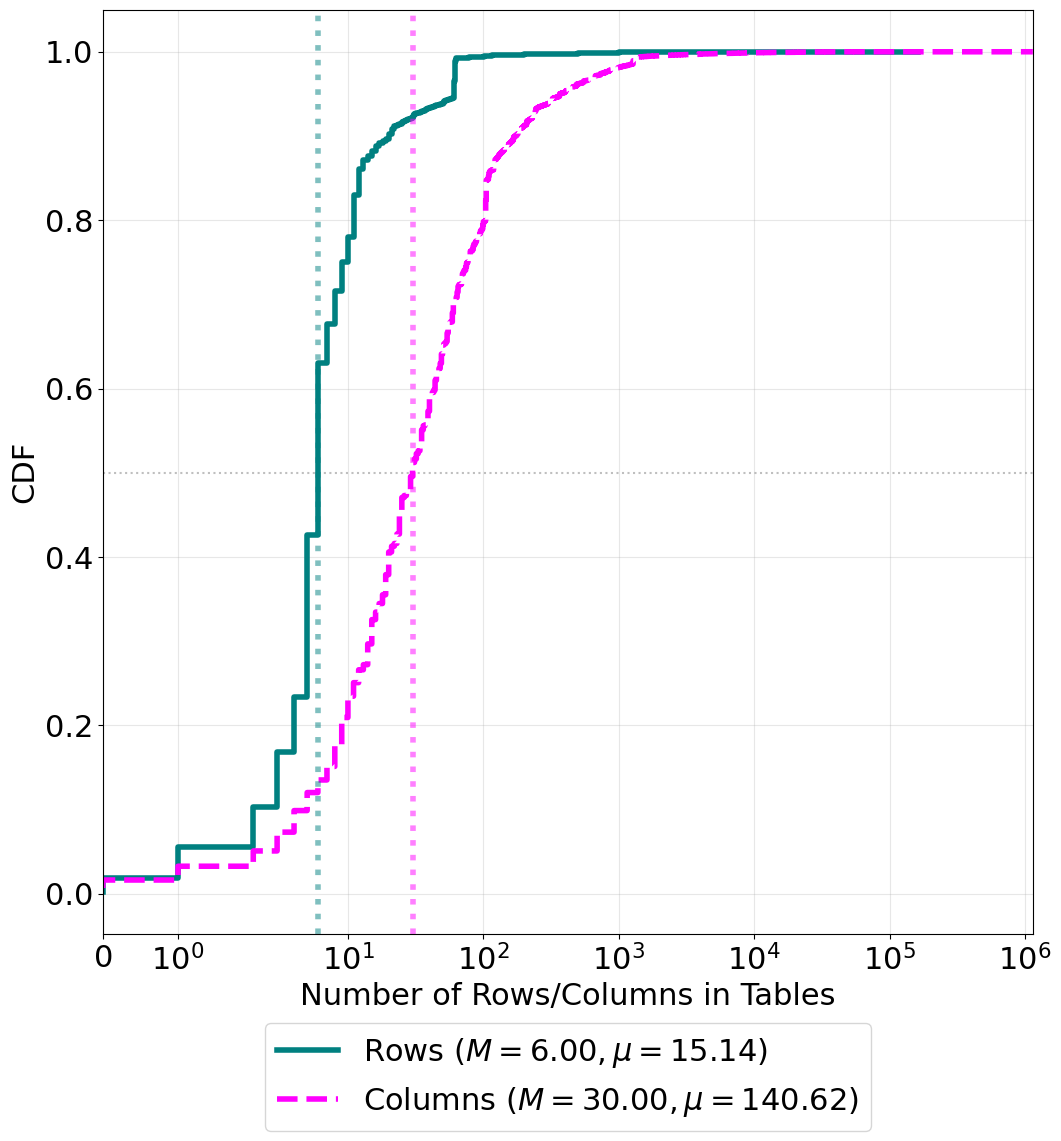

In [112]:
fig, ax = plt.subplots(nrows=1, ncols=1, figsize=(12, 12))

matplotlib.rcParams.update({'font.size': 22})

rows = []
cols = []
row_col_details = []
elements = gdf['table_metadata'].tolist()
for d in elements:
    for pair in d:
        row_col_details.append(pair)
        rows.append(pair[0])
        cols.append(pair[1])

rows_x, rows_y = cdf(rows)
cols_x, cols_y = cdf(cols)
for p in [25, 50, 75, 80, 85, 88, 90, 95, 99, 100]:
    print(f'Rows: [p{p}] = {numpy.percentile(rows_x, p)}')
    print(f'Cols: [p{p}] = {numpy.percentile(cols_x, p)}')
    print()
    
    
horizontal_line = ax.axhline(y=0.5, linestyle=':', color='gray', alpha=0.5)
median_rows = numpy.median(rows_x)
median_cols = numpy.median(cols_x)
mean_rows = numpy.mean(rows_x)
mean_cols = numpy.mean(cols_x)

sns.lineplot(x=rows_x, y=rows_y,
             drawstyle='steps-pre',
             errorbar=None, ax=ax,
             color='teal',
             linewidth=4,
             label=f'Rows $(M={median_rows:.2f},\mu={mean_rows:.2f})$')

sns.lineplot(x=cols_x, y=cols_y,
             drawstyle='steps-pre',
             errorbar=None, ax=ax,
             color='magenta',
             linewidth=4,
             linestyle='--',
             label=f'Columns $(M={median_cols:.2f},\mu={mean_cols:.2f})$')


ax.axvline(x=median_rows, linestyle=':', color='teal', alpha=0.5, linewidth=4)
ax.axvline(x=median_cols, linestyle=':', color='magenta', alpha=0.5, linewidth=4)

ax.set_xscale('symlog')
ax.set_xlim(0, max(rows_x[-1], cols_x[-1]))

ax.set_xlabel('Number of Rows/Columns in Tables')
ax.set_ylabel('CDF')

ax.grid(True, alpha=0.3)

ax.legend(fancybox=True, bbox_to_anchor=(0.45, -0.23, 0.1, 0.1), loc='lower center')
plt.savefig('submission-figures/table-row-columns-cdf.pdf', bbox_inches='tight')

# Type of Image Analysis

In [24]:
df = pandas.read_csv('submission-fixed-nb_processed.csv', converters={'image_metadata': json.loads, 'imports': json.loads, 'code_lines': json.loads, 'markdown_lines': json.loads})
df.head()

fileNames language  \
0  dce6111ca85bec288f66abf073b05f1e765d88c7.ipynb  python3   
1  34764addd2e5b1aa62939bd6678decf7d3e705df.ipynb  python3   
2  d65342252111a9ee979858081d7d21639064bc54.ipynb  python3   
3  f83b551ea97932e38017db3540484525bf0daa05.ipynb  python3   
4  2eabdde2de2e4a1f834e4073ef6b408bfb8ed722.ipynb  python3   

                                             imports  num_images  \
0  [ requests, bs4 BeautifulSoup,  os, slugify sl...           0   
1  [google.colab drive,  numpy,  pandas,  matplot...          18   
2  [ matplotlib.pyplot, skimage color, skimage io...           2   
3  [ dicom,  SimpleITK,  numpy,  array, numpy unr...          14   
4  [ matplotlib,  matplotlib.pyplot,  numpy,  skl...           0   

                                      image_metadata  has_matplotlib  \
0                                                 []               0   
1  [text/html, text/plain, text/plain, text/html,...               2   
2                            [image/png, text/plain]               0   
3  [text/html, text/vnd.plotly.v1+html, applicati...               0   
4                                                 []               0   

   has_plotly  has_bokeh                                         code_lines  \
0           0          0            [3, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1]   
1           0          1  [1, 1, 5, 2, 3, 3, 3, 3, 2, 2, 1, 2, 5, 2, 1, ...   
2           0          1                                      [4, 2, 22, 1]   
3           0          0                             [22, 3, 13, 26, 33, 1]   
4           0          0                   [18, 8, 8, 10, 18, 27, 1, 79, 1]   

   total_code_lines                                     markdown_lines  \
0                15                           [2, 2, 2, 2, 2, 2, 2, 2]   
1               211  [2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, ...   
2                29                                                 []   
3                98                                                 []   
4               170                                                 []   

   sum_markdown_lines  
0                  16  
1                  62  
2                   0  
3                   0  
4                   0

In [25]:
from collections import Counter

In [26]:
fdf = df[['fileNames', 'language', 'image_metadata']]
fdf['img_counts'] = fdf['image_metadata'].apply(lambda r: dict(Counter(r)))
fdf

/tmp/ipykernel_186946/3580949639.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  fdf['img_counts'] = fdf['image_metadata'].apply(lambda r: dict(Counter(r)))


fileNames             language  \
0      dce6111ca85bec288f66abf073b05f1e765d88c7.ipynb              python3   
1      34764addd2e5b1aa62939bd6678decf7d3e705df.ipynb              python3   
2      d65342252111a9ee979858081d7d21639064bc54.ipynb              python3   
3      f83b551ea97932e38017db3540484525bf0daa05.ipynb              python3   
4      2eabdde2de2e4a1f834e4073ef6b408bfb8ed722.ipynb              python3   
...                                               ...                  ...   
99995  fa7860e0482d6faec7ce30643e27850b1c4f429a.ipynb              python3   
99996  ce349e61fc701492e701b258d3f23305085afed4.ipynb              python3   
99997  dbcc98729998b67bf9b638b1d1f4e6710bc507a0.ipynb              python3   
99998  6bc5d894325a307362fad2b98c94f1f47f7984fe.ipynb  conda-env-tf-cpu-py   
99999  bd8dcc64f8eaf4eecc3fb1a49e54d5595e6560a7.ipynb              python3   

                                          image_metadata  \
0                                                     []   
1      [text/html, text/plain, text/plain, text/html,...   
2                                [image/png, text/plain]   
3      [text/html, text/vnd.plotly.v1+html, applicati...   
4                                                     []   
...                                                  ...   
99995                                                 []   
99996  [text/html, text/plain, text/html, text/plain,...   
99997                                                 []   
99998                            [image/png, text/plain]   
99999     [image/png, text/plain, image/png, text/plain]   

                                              img_counts  
0                                                     {}  
1      {'text/html': 2, 'text/plain': 14, 'image/png'...  
2                      {'image/png': 1, 'text/plain': 1}  
3      {'text/html': 5, 'text/vnd.plotly.v1+html': 2,...  
4                                                     {}  
...                                                  ...  
99995                                                 {}  
99996                {'text/html': 21, 'text/plain': 31}  
99997                                                 {}  
99998                  {'image/png': 1, 'text/plain': 1}  
99999                  {'image/png': 2, 'text/plain': 2}  

[100000 rows x 4 columns]

In [27]:
def json_to_series(text):
    keys = []
    values = []
    for k, v in text.items():
        values.append(v)
        keys.append(k)
    return pandas.Series(values, index=keys)

In [28]:
fdf = pandas.concat([fdf, fdf['img_counts'].apply(json_to_series)], axis=1)
fdf

/tmp/ipykernel_186946/1799165530.py:7: FutureWarning: The default dtype for empty Series will be 'object' instead of 'float64' in a future version. Specify a dtype explicitly to silence this warning.
  return pandas.Series(values, index=keys)
/tmp/ipykernel_186946/1799165530.py:7: FutureWarning: The default dtype for empty Series will be 'object' instead of 'float64' in a future version. Specify a dtype explicitly to silence this warning.
  return pandas.Series(values, index=keys)
/tmp/ipykernel_186946/1799165530.py:7: FutureWarning: The default dtype for empty Series will be 'object' instead of 'float64' in a future version. Specify a dtype explicitly to silence this warning.
  return pandas.Series(values, index=keys)
/tmp/ipykernel_186946/1799165530.py:7: FutureWarning: The default dtype for empty Series will be 'object' instead of 'float64' in a future version. Specify a dtype explicitly to silence this warning.
  return pandas.Series(values, index=keys)
/tmp/ipykernel_186946/179916

/tmp/ipykernel_186946/1799165530.py:7: FutureWarning: The default dtype for empty Series will be 'object' instead of 'float64' in a future version. Specify a dtype explicitly to silence this warning.
  return pandas.Series(values, index=keys)
/tmp/ipykernel_186946/1799165530.py:7: FutureWarning: The default dtype for empty Series will be 'object' instead of 'float64' in a future version. Specify a dtype explicitly to silence this warning.
  return pandas.Series(values, index=keys)
/tmp/ipykernel_186946/1799165530.py:7: FutureWarning: The default dtype for empty Series will be 'object' instead of 'float64' in a future version. Specify a dtype explicitly to silence this warning.
  return pandas.Series(values, index=keys)
/tmp/ipykernel_186946/1799165530.py:7: FutureWarning: The default dtype for empty Series will be 'object' instead of 'float64' in a future version. Specify a dtype explicitly to silence this warning.
  return pandas.Series(values, index=keys)
/tmp/ipykernel_186946/179916

/tmp/ipykernel_186946/1799165530.py:7: FutureWarning: The default dtype for empty Series will be 'object' instead of 'float64' in a future version. Specify a dtype explicitly to silence this warning.
  return pandas.Series(values, index=keys)
/tmp/ipykernel_186946/1799165530.py:7: FutureWarning: The default dtype for empty Series will be 'object' instead of 'float64' in a future version. Specify a dtype explicitly to silence this warning.
  return pandas.Series(values, index=keys)
/tmp/ipykernel_186946/1799165530.py:7: FutureWarning: The default dtype for empty Series will be 'object' instead of 'float64' in a future version. Specify a dtype explicitly to silence this warning.
  return pandas.Series(values, index=keys)
/tmp/ipykernel_186946/1799165530.py:7: FutureWarning: The default dtype for empty Series will be 'object' instead of 'float64' in a future version. Specify a dtype explicitly to silence this warning.
  return pandas.Series(values, index=keys)
/tmp/ipykernel_186946/179916

/tmp/ipykernel_186946/1799165530.py:7: FutureWarning: The default dtype for empty Series will be 'object' instead of 'float64' in a future version. Specify a dtype explicitly to silence this warning.
  return pandas.Series(values, index=keys)
/tmp/ipykernel_186946/1799165530.py:7: FutureWarning: The default dtype for empty Series will be 'object' instead of 'float64' in a future version. Specify a dtype explicitly to silence this warning.
  return pandas.Series(values, index=keys)
/tmp/ipykernel_186946/1799165530.py:7: FutureWarning: The default dtype for empty Series will be 'object' instead of 'float64' in a future version. Specify a dtype explicitly to silence this warning.
  return pandas.Series(values, index=keys)
/tmp/ipykernel_186946/1799165530.py:7: FutureWarning: The default dtype for empty Series will be 'object' instead of 'float64' in a future version. Specify a dtype explicitly to silence this warning.
  return pandas.Series(values, index=keys)
/tmp/ipykernel_186946/179916

/tmp/ipykernel_186946/1799165530.py:7: FutureWarning: The default dtype for empty Series will be 'object' instead of 'float64' in a future version. Specify a dtype explicitly to silence this warning.
  return pandas.Series(values, index=keys)
/tmp/ipykernel_186946/1799165530.py:7: FutureWarning: The default dtype for empty Series will be 'object' instead of 'float64' in a future version. Specify a dtype explicitly to silence this warning.
  return pandas.Series(values, index=keys)
/tmp/ipykernel_186946/1799165530.py:7: FutureWarning: The default dtype for empty Series will be 'object' instead of 'float64' in a future version. Specify a dtype explicitly to silence this warning.
  return pandas.Series(values, index=keys)
/tmp/ipykernel_186946/1799165530.py:7: FutureWarning: The default dtype for empty Series will be 'object' instead of 'float64' in a future version. Specify a dtype explicitly to silence this warning.
  return pandas.Series(values, index=keys)
/tmp/ipykernel_186946/179916

/tmp/ipykernel_186946/1799165530.py:7: FutureWarning: The default dtype for empty Series will be 'object' instead of 'float64' in a future version. Specify a dtype explicitly to silence this warning.
  return pandas.Series(values, index=keys)
/tmp/ipykernel_186946/1799165530.py:7: FutureWarning: The default dtype for empty Series will be 'object' instead of 'float64' in a future version. Specify a dtype explicitly to silence this warning.
  return pandas.Series(values, index=keys)
/tmp/ipykernel_186946/1799165530.py:7: FutureWarning: The default dtype for empty Series will be 'object' instead of 'float64' in a future version. Specify a dtype explicitly to silence this warning.
  return pandas.Series(values, index=keys)
/tmp/ipykernel_186946/1799165530.py:7: FutureWarning: The default dtype for empty Series will be 'object' instead of 'float64' in a future version. Specify a dtype explicitly to silence this warning.
  return pandas.Series(values, index=keys)
/tmp/ipykernel_186946/179916

/tmp/ipykernel_186946/1799165530.py:7: FutureWarning: The default dtype for empty Series will be 'object' instead of 'float64' in a future version. Specify a dtype explicitly to silence this warning.
  return pandas.Series(values, index=keys)
/tmp/ipykernel_186946/1799165530.py:7: FutureWarning: The default dtype for empty Series will be 'object' instead of 'float64' in a future version. Specify a dtype explicitly to silence this warning.
  return pandas.Series(values, index=keys)
/tmp/ipykernel_186946/1799165530.py:7: FutureWarning: The default dtype for empty Series will be 'object' instead of 'float64' in a future version. Specify a dtype explicitly to silence this warning.
  return pandas.Series(values, index=keys)
/tmp/ipykernel_186946/1799165530.py:7: FutureWarning: The default dtype for empty Series will be 'object' instead of 'float64' in a future version. Specify a dtype explicitly to silence this warning.
  return pandas.Series(values, index=keys)
/tmp/ipykernel_186946/179916

/tmp/ipykernel_186946/1799165530.py:7: FutureWarning: The default dtype for empty Series will be 'object' instead of 'float64' in a future version. Specify a dtype explicitly to silence this warning.
  return pandas.Series(values, index=keys)
/tmp/ipykernel_186946/1799165530.py:7: FutureWarning: The default dtype for empty Series will be 'object' instead of 'float64' in a future version. Specify a dtype explicitly to silence this warning.
  return pandas.Series(values, index=keys)
/tmp/ipykernel_186946/1799165530.py:7: FutureWarning: The default dtype for empty Series will be 'object' instead of 'float64' in a future version. Specify a dtype explicitly to silence this warning.
  return pandas.Series(values, index=keys)
/tmp/ipykernel_186946/1799165530.py:7: FutureWarning: The default dtype for empty Series will be 'object' instead of 'float64' in a future version. Specify a dtype explicitly to silence this warning.
  return pandas.Series(values, index=keys)
/tmp/ipykernel_186946/179916

/tmp/ipykernel_186946/1799165530.py:7: FutureWarning: The default dtype for empty Series will be 'object' instead of 'float64' in a future version. Specify a dtype explicitly to silence this warning.
  return pandas.Series(values, index=keys)
/tmp/ipykernel_186946/1799165530.py:7: FutureWarning: The default dtype for empty Series will be 'object' instead of 'float64' in a future version. Specify a dtype explicitly to silence this warning.
  return pandas.Series(values, index=keys)
/tmp/ipykernel_186946/1799165530.py:7: FutureWarning: The default dtype for empty Series will be 'object' instead of 'float64' in a future version. Specify a dtype explicitly to silence this warning.
  return pandas.Series(values, index=keys)
/tmp/ipykernel_186946/1799165530.py:7: FutureWarning: The default dtype for empty Series will be 'object' instead of 'float64' in a future version. Specify a dtype explicitly to silence this warning.
  return pandas.Series(values, index=keys)
/tmp/ipykernel_186946/179916

/tmp/ipykernel_186946/1799165530.py:7: FutureWarning: The default dtype for empty Series will be 'object' instead of 'float64' in a future version. Specify a dtype explicitly to silence this warning.
  return pandas.Series(values, index=keys)
/tmp/ipykernel_186946/1799165530.py:7: FutureWarning: The default dtype for empty Series will be 'object' instead of 'float64' in a future version. Specify a dtype explicitly to silence this warning.
  return pandas.Series(values, index=keys)
/tmp/ipykernel_186946/1799165530.py:7: FutureWarning: The default dtype for empty Series will be 'object' instead of 'float64' in a future version. Specify a dtype explicitly to silence this warning.
  return pandas.Series(values, index=keys)
/tmp/ipykernel_186946/1799165530.py:7: FutureWarning: The default dtype for empty Series will be 'object' instead of 'float64' in a future version. Specify a dtype explicitly to silence this warning.
  return pandas.Series(values, index=keys)
/tmp/ipykernel_186946/179916

/tmp/ipykernel_186946/1799165530.py:7: FutureWarning: The default dtype for empty Series will be 'object' instead of 'float64' in a future version. Specify a dtype explicitly to silence this warning.
  return pandas.Series(values, index=keys)
/tmp/ipykernel_186946/1799165530.py:7: FutureWarning: The default dtype for empty Series will be 'object' instead of 'float64' in a future version. Specify a dtype explicitly to silence this warning.
  return pandas.Series(values, index=keys)
/tmp/ipykernel_186946/1799165530.py:7: FutureWarning: The default dtype for empty Series will be 'object' instead of 'float64' in a future version. Specify a dtype explicitly to silence this warning.
  return pandas.Series(values, index=keys)
/tmp/ipykernel_186946/1799165530.py:7: FutureWarning: The default dtype for empty Series will be 'object' instead of 'float64' in a future version. Specify a dtype explicitly to silence this warning.
  return pandas.Series(values, index=keys)
/tmp/ipykernel_186946/179916

/tmp/ipykernel_186946/1799165530.py:7: FutureWarning: The default dtype for empty Series will be 'object' instead of 'float64' in a future version. Specify a dtype explicitly to silence this warning.
  return pandas.Series(values, index=keys)
/tmp/ipykernel_186946/1799165530.py:7: FutureWarning: The default dtype for empty Series will be 'object' instead of 'float64' in a future version. Specify a dtype explicitly to silence this warning.
  return pandas.Series(values, index=keys)
/tmp/ipykernel_186946/1799165530.py:7: FutureWarning: The default dtype for empty Series will be 'object' instead of 'float64' in a future version. Specify a dtype explicitly to silence this warning.
  return pandas.Series(values, index=keys)
/tmp/ipykernel_186946/1799165530.py:7: FutureWarning: The default dtype for empty Series will be 'object' instead of 'float64' in a future version. Specify a dtype explicitly to silence this warning.
  return pandas.Series(values, index=keys)
/tmp/ipykernel_186946/179916

/tmp/ipykernel_186946/1799165530.py:7: FutureWarning: The default dtype for empty Series will be 'object' instead of 'float64' in a future version. Specify a dtype explicitly to silence this warning.
  return pandas.Series(values, index=keys)
/tmp/ipykernel_186946/1799165530.py:7: FutureWarning: The default dtype for empty Series will be 'object' instead of 'float64' in a future version. Specify a dtype explicitly to silence this warning.
  return pandas.Series(values, index=keys)
/tmp/ipykernel_186946/1799165530.py:7: FutureWarning: The default dtype for empty Series will be 'object' instead of 'float64' in a future version. Specify a dtype explicitly to silence this warning.
  return pandas.Series(values, index=keys)
/tmp/ipykernel_186946/1799165530.py:7: FutureWarning: The default dtype for empty Series will be 'object' instead of 'float64' in a future version. Specify a dtype explicitly to silence this warning.
  return pandas.Series(values, index=keys)
/tmp/ipykernel_186946/179916

/tmp/ipykernel_186946/1799165530.py:7: FutureWarning: The default dtype for empty Series will be 'object' instead of 'float64' in a future version. Specify a dtype explicitly to silence this warning.
  return pandas.Series(values, index=keys)
/tmp/ipykernel_186946/1799165530.py:7: FutureWarning: The default dtype for empty Series will be 'object' instead of 'float64' in a future version. Specify a dtype explicitly to silence this warning.
  return pandas.Series(values, index=keys)
/tmp/ipykernel_186946/1799165530.py:7: FutureWarning: The default dtype for empty Series will be 'object' instead of 'float64' in a future version. Specify a dtype explicitly to silence this warning.
  return pandas.Series(values, index=keys)
/tmp/ipykernel_186946/1799165530.py:7: FutureWarning: The default dtype for empty Series will be 'object' instead of 'float64' in a future version. Specify a dtype explicitly to silence this warning.
  return pandas.Series(values, index=keys)
/tmp/ipykernel_186946/179916

/tmp/ipykernel_186946/1799165530.py:7: FutureWarning: The default dtype for empty Series will be 'object' instead of 'float64' in a future version. Specify a dtype explicitly to silence this warning.
  return pandas.Series(values, index=keys)
/tmp/ipykernel_186946/1799165530.py:7: FutureWarning: The default dtype for empty Series will be 'object' instead of 'float64' in a future version. Specify a dtype explicitly to silence this warning.
  return pandas.Series(values, index=keys)
/tmp/ipykernel_186946/1799165530.py:7: FutureWarning: The default dtype for empty Series will be 'object' instead of 'float64' in a future version. Specify a dtype explicitly to silence this warning.
  return pandas.Series(values, index=keys)
/tmp/ipykernel_186946/1799165530.py:7: FutureWarning: The default dtype for empty Series will be 'object' instead of 'float64' in a future version. Specify a dtype explicitly to silence this warning.
  return pandas.Series(values, index=keys)
/tmp/ipykernel_186946/179916

/tmp/ipykernel_186946/1799165530.py:7: FutureWarning: The default dtype for empty Series will be 'object' instead of 'float64' in a future version. Specify a dtype explicitly to silence this warning.
  return pandas.Series(values, index=keys)
/tmp/ipykernel_186946/1799165530.py:7: FutureWarning: The default dtype for empty Series will be 'object' instead of 'float64' in a future version. Specify a dtype explicitly to silence this warning.
  return pandas.Series(values, index=keys)
/tmp/ipykernel_186946/1799165530.py:7: FutureWarning: The default dtype for empty Series will be 'object' instead of 'float64' in a future version. Specify a dtype explicitly to silence this warning.
  return pandas.Series(values, index=keys)
/tmp/ipykernel_186946/1799165530.py:7: FutureWarning: The default dtype for empty Series will be 'object' instead of 'float64' in a future version. Specify a dtype explicitly to silence this warning.
  return pandas.Series(values, index=keys)
/tmp/ipykernel_186946/179916

/tmp/ipykernel_186946/1799165530.py:7: FutureWarning: The default dtype for empty Series will be 'object' instead of 'float64' in a future version. Specify a dtype explicitly to silence this warning.
  return pandas.Series(values, index=keys)
/tmp/ipykernel_186946/1799165530.py:7: FutureWarning: The default dtype for empty Series will be 'object' instead of 'float64' in a future version. Specify a dtype explicitly to silence this warning.
  return pandas.Series(values, index=keys)
/tmp/ipykernel_186946/1799165530.py:7: FutureWarning: The default dtype for empty Series will be 'object' instead of 'float64' in a future version. Specify a dtype explicitly to silence this warning.
  return pandas.Series(values, index=keys)
/tmp/ipykernel_186946/1799165530.py:7: FutureWarning: The default dtype for empty Series will be 'object' instead of 'float64' in a future version. Specify a dtype explicitly to silence this warning.
  return pandas.Series(values, index=keys)
/tmp/ipykernel_186946/179916

/tmp/ipykernel_186946/1799165530.py:7: FutureWarning: The default dtype for empty Series will be 'object' instead of 'float64' in a future version. Specify a dtype explicitly to silence this warning.
  return pandas.Series(values, index=keys)
/tmp/ipykernel_186946/1799165530.py:7: FutureWarning: The default dtype for empty Series will be 'object' instead of 'float64' in a future version. Specify a dtype explicitly to silence this warning.
  return pandas.Series(values, index=keys)
/tmp/ipykernel_186946/1799165530.py:7: FutureWarning: The default dtype for empty Series will be 'object' instead of 'float64' in a future version. Specify a dtype explicitly to silence this warning.
  return pandas.Series(values, index=keys)
/tmp/ipykernel_186946/1799165530.py:7: FutureWarning: The default dtype for empty Series will be 'object' instead of 'float64' in a future version. Specify a dtype explicitly to silence this warning.
  return pandas.Series(values, index=keys)
/tmp/ipykernel_186946/179916

/tmp/ipykernel_186946/1799165530.py:7: FutureWarning: The default dtype for empty Series will be 'object' instead of 'float64' in a future version. Specify a dtype explicitly to silence this warning.
  return pandas.Series(values, index=keys)
/tmp/ipykernel_186946/1799165530.py:7: FutureWarning: The default dtype for empty Series will be 'object' instead of 'float64' in a future version. Specify a dtype explicitly to silence this warning.
  return pandas.Series(values, index=keys)
/tmp/ipykernel_186946/1799165530.py:7: FutureWarning: The default dtype for empty Series will be 'object' instead of 'float64' in a future version. Specify a dtype explicitly to silence this warning.
  return pandas.Series(values, index=keys)
/tmp/ipykernel_186946/1799165530.py:7: FutureWarning: The default dtype for empty Series will be 'object' instead of 'float64' in a future version. Specify a dtype explicitly to silence this warning.
  return pandas.Series(values, index=keys)
/tmp/ipykernel_186946/179916

/tmp/ipykernel_186946/1799165530.py:7: FutureWarning: The default dtype for empty Series will be 'object' instead of 'float64' in a future version. Specify a dtype explicitly to silence this warning.
  return pandas.Series(values, index=keys)
/tmp/ipykernel_186946/1799165530.py:7: FutureWarning: The default dtype for empty Series will be 'object' instead of 'float64' in a future version. Specify a dtype explicitly to silence this warning.
  return pandas.Series(values, index=keys)
/tmp/ipykernel_186946/1799165530.py:7: FutureWarning: The default dtype for empty Series will be 'object' instead of 'float64' in a future version. Specify a dtype explicitly to silence this warning.
  return pandas.Series(values, index=keys)
/tmp/ipykernel_186946/1799165530.py:7: FutureWarning: The default dtype for empty Series will be 'object' instead of 'float64' in a future version. Specify a dtype explicitly to silence this warning.
  return pandas.Series(values, index=keys)
/tmp/ipykernel_186946/179916

/tmp/ipykernel_186946/1799165530.py:7: FutureWarning: The default dtype for empty Series will be 'object' instead of 'float64' in a future version. Specify a dtype explicitly to silence this warning.
  return pandas.Series(values, index=keys)
/tmp/ipykernel_186946/1799165530.py:7: FutureWarning: The default dtype for empty Series will be 'object' instead of 'float64' in a future version. Specify a dtype explicitly to silence this warning.
  return pandas.Series(values, index=keys)
/tmp/ipykernel_186946/1799165530.py:7: FutureWarning: The default dtype for empty Series will be 'object' instead of 'float64' in a future version. Specify a dtype explicitly to silence this warning.
  return pandas.Series(values, index=keys)
/tmp/ipykernel_186946/1799165530.py:7: FutureWarning: The default dtype for empty Series will be 'object' instead of 'float64' in a future version. Specify a dtype explicitly to silence this warning.
  return pandas.Series(values, index=keys)
/tmp/ipykernel_186946/179916

/tmp/ipykernel_186946/1799165530.py:7: FutureWarning: The default dtype for empty Series will be 'object' instead of 'float64' in a future version. Specify a dtype explicitly to silence this warning.
  return pandas.Series(values, index=keys)
/tmp/ipykernel_186946/1799165530.py:7: FutureWarning: The default dtype for empty Series will be 'object' instead of 'float64' in a future version. Specify a dtype explicitly to silence this warning.
  return pandas.Series(values, index=keys)
/tmp/ipykernel_186946/1799165530.py:7: FutureWarning: The default dtype for empty Series will be 'object' instead of 'float64' in a future version. Specify a dtype explicitly to silence this warning.
  return pandas.Series(values, index=keys)
/tmp/ipykernel_186946/1799165530.py:7: FutureWarning: The default dtype for empty Series will be 'object' instead of 'float64' in a future version. Specify a dtype explicitly to silence this warning.
  return pandas.Series(values, index=keys)
/tmp/ipykernel_186946/179916

/tmp/ipykernel_186946/1799165530.py:7: FutureWarning: The default dtype for empty Series will be 'object' instead of 'float64' in a future version. Specify a dtype explicitly to silence this warning.
  return pandas.Series(values, index=keys)
/tmp/ipykernel_186946/1799165530.py:7: FutureWarning: The default dtype for empty Series will be 'object' instead of 'float64' in a future version. Specify a dtype explicitly to silence this warning.
  return pandas.Series(values, index=keys)
/tmp/ipykernel_186946/1799165530.py:7: FutureWarning: The default dtype for empty Series will be 'object' instead of 'float64' in a future version. Specify a dtype explicitly to silence this warning.
  return pandas.Series(values, index=keys)
/tmp/ipykernel_186946/1799165530.py:7: FutureWarning: The default dtype for empty Series will be 'object' instead of 'float64' in a future version. Specify a dtype explicitly to silence this warning.
  return pandas.Series(values, index=keys)
/tmp/ipykernel_186946/179916

/tmp/ipykernel_186946/1799165530.py:7: FutureWarning: The default dtype for empty Series will be 'object' instead of 'float64' in a future version. Specify a dtype explicitly to silence this warning.
  return pandas.Series(values, index=keys)
/tmp/ipykernel_186946/1799165530.py:7: FutureWarning: The default dtype for empty Series will be 'object' instead of 'float64' in a future version. Specify a dtype explicitly to silence this warning.
  return pandas.Series(values, index=keys)
/tmp/ipykernel_186946/1799165530.py:7: FutureWarning: The default dtype for empty Series will be 'object' instead of 'float64' in a future version. Specify a dtype explicitly to silence this warning.
  return pandas.Series(values, index=keys)
/tmp/ipykernel_186946/1799165530.py:7: FutureWarning: The default dtype for empty Series will be 'object' instead of 'float64' in a future version. Specify a dtype explicitly to silence this warning.
  return pandas.Series(values, index=keys)
/tmp/ipykernel_186946/179916

/tmp/ipykernel_186946/1799165530.py:7: FutureWarning: The default dtype for empty Series will be 'object' instead of 'float64' in a future version. Specify a dtype explicitly to silence this warning.
  return pandas.Series(values, index=keys)
/tmp/ipykernel_186946/1799165530.py:7: FutureWarning: The default dtype for empty Series will be 'object' instead of 'float64' in a future version. Specify a dtype explicitly to silence this warning.
  return pandas.Series(values, index=keys)
/tmp/ipykernel_186946/1799165530.py:7: FutureWarning: The default dtype for empty Series will be 'object' instead of 'float64' in a future version. Specify a dtype explicitly to silence this warning.
  return pandas.Series(values, index=keys)
/tmp/ipykernel_186946/1799165530.py:7: FutureWarning: The default dtype for empty Series will be 'object' instead of 'float64' in a future version. Specify a dtype explicitly to silence this warning.
  return pandas.Series(values, index=keys)
/tmp/ipykernel_186946/179916

/tmp/ipykernel_186946/1799165530.py:7: FutureWarning: The default dtype for empty Series will be 'object' instead of 'float64' in a future version. Specify a dtype explicitly to silence this warning.
  return pandas.Series(values, index=keys)
/tmp/ipykernel_186946/1799165530.py:7: FutureWarning: The default dtype for empty Series will be 'object' instead of 'float64' in a future version. Specify a dtype explicitly to silence this warning.
  return pandas.Series(values, index=keys)
/tmp/ipykernel_186946/1799165530.py:7: FutureWarning: The default dtype for empty Series will be 'object' instead of 'float64' in a future version. Specify a dtype explicitly to silence this warning.
  return pandas.Series(values, index=keys)
/tmp/ipykernel_186946/1799165530.py:7: FutureWarning: The default dtype for empty Series will be 'object' instead of 'float64' in a future version. Specify a dtype explicitly to silence this warning.
  return pandas.Series(values, index=keys)
/tmp/ipykernel_186946/179916

/tmp/ipykernel_186946/1799165530.py:7: FutureWarning: The default dtype for empty Series will be 'object' instead of 'float64' in a future version. Specify a dtype explicitly to silence this warning.
  return pandas.Series(values, index=keys)
/tmp/ipykernel_186946/1799165530.py:7: FutureWarning: The default dtype for empty Series will be 'object' instead of 'float64' in a future version. Specify a dtype explicitly to silence this warning.
  return pandas.Series(values, index=keys)
/tmp/ipykernel_186946/1799165530.py:7: FutureWarning: The default dtype for empty Series will be 'object' instead of 'float64' in a future version. Specify a dtype explicitly to silence this warning.
  return pandas.Series(values, index=keys)
/tmp/ipykernel_186946/1799165530.py:7: FutureWarning: The default dtype for empty Series will be 'object' instead of 'float64' in a future version. Specify a dtype explicitly to silence this warning.
  return pandas.Series(values, index=keys)
/tmp/ipykernel_186946/179916

/tmp/ipykernel_186946/1799165530.py:7: FutureWarning: The default dtype for empty Series will be 'object' instead of 'float64' in a future version. Specify a dtype explicitly to silence this warning.
  return pandas.Series(values, index=keys)
/tmp/ipykernel_186946/1799165530.py:7: FutureWarning: The default dtype for empty Series will be 'object' instead of 'float64' in a future version. Specify a dtype explicitly to silence this warning.
  return pandas.Series(values, index=keys)
/tmp/ipykernel_186946/1799165530.py:7: FutureWarning: The default dtype for empty Series will be 'object' instead of 'float64' in a future version. Specify a dtype explicitly to silence this warning.
  return pandas.Series(values, index=keys)
/tmp/ipykernel_186946/1799165530.py:7: FutureWarning: The default dtype for empty Series will be 'object' instead of 'float64' in a future version. Specify a dtype explicitly to silence this warning.
  return pandas.Series(values, index=keys)
/tmp/ipykernel_186946/179916

/tmp/ipykernel_186946/1799165530.py:7: FutureWarning: The default dtype for empty Series will be 'object' instead of 'float64' in a future version. Specify a dtype explicitly to silence this warning.
  return pandas.Series(values, index=keys)
/tmp/ipykernel_186946/1799165530.py:7: FutureWarning: The default dtype for empty Series will be 'object' instead of 'float64' in a future version. Specify a dtype explicitly to silence this warning.
  return pandas.Series(values, index=keys)
/tmp/ipykernel_186946/1799165530.py:7: FutureWarning: The default dtype for empty Series will be 'object' instead of 'float64' in a future version. Specify a dtype explicitly to silence this warning.
  return pandas.Series(values, index=keys)
/tmp/ipykernel_186946/1799165530.py:7: FutureWarning: The default dtype for empty Series will be 'object' instead of 'float64' in a future version. Specify a dtype explicitly to silence this warning.
  return pandas.Series(values, index=keys)
/tmp/ipykernel_186946/179916

/tmp/ipykernel_186946/1799165530.py:7: FutureWarning: The default dtype for empty Series will be 'object' instead of 'float64' in a future version. Specify a dtype explicitly to silence this warning.
  return pandas.Series(values, index=keys)
/tmp/ipykernel_186946/1799165530.py:7: FutureWarning: The default dtype for empty Series will be 'object' instead of 'float64' in a future version. Specify a dtype explicitly to silence this warning.
  return pandas.Series(values, index=keys)
/tmp/ipykernel_186946/1799165530.py:7: FutureWarning: The default dtype for empty Series will be 'object' instead of 'float64' in a future version. Specify a dtype explicitly to silence this warning.
  return pandas.Series(values, index=keys)
/tmp/ipykernel_186946/1799165530.py:7: FutureWarning: The default dtype for empty Series will be 'object' instead of 'float64' in a future version. Specify a dtype explicitly to silence this warning.
  return pandas.Series(values, index=keys)
/tmp/ipykernel_186946/179916

/tmp/ipykernel_186946/1799165530.py:7: FutureWarning: The default dtype for empty Series will be 'object' instead of 'float64' in a future version. Specify a dtype explicitly to silence this warning.
  return pandas.Series(values, index=keys)
/tmp/ipykernel_186946/1799165530.py:7: FutureWarning: The default dtype for empty Series will be 'object' instead of 'float64' in a future version. Specify a dtype explicitly to silence this warning.
  return pandas.Series(values, index=keys)
/tmp/ipykernel_186946/1799165530.py:7: FutureWarning: The default dtype for empty Series will be 'object' instead of 'float64' in a future version. Specify a dtype explicitly to silence this warning.
  return pandas.Series(values, index=keys)
/tmp/ipykernel_186946/1799165530.py:7: FutureWarning: The default dtype for empty Series will be 'object' instead of 'float64' in a future version. Specify a dtype explicitly to silence this warning.
  return pandas.Series(values, index=keys)
/tmp/ipykernel_186946/179916

/tmp/ipykernel_186946/1799165530.py:7: FutureWarning: The default dtype for empty Series will be 'object' instead of 'float64' in a future version. Specify a dtype explicitly to silence this warning.
  return pandas.Series(values, index=keys)
/tmp/ipykernel_186946/1799165530.py:7: FutureWarning: The default dtype for empty Series will be 'object' instead of 'float64' in a future version. Specify a dtype explicitly to silence this warning.
  return pandas.Series(values, index=keys)
/tmp/ipykernel_186946/1799165530.py:7: FutureWarning: The default dtype for empty Series will be 'object' instead of 'float64' in a future version. Specify a dtype explicitly to silence this warning.
  return pandas.Series(values, index=keys)
/tmp/ipykernel_186946/1799165530.py:7: FutureWarning: The default dtype for empty Series will be 'object' instead of 'float64' in a future version. Specify a dtype explicitly to silence this warning.
  return pandas.Series(values, index=keys)
/tmp/ipykernel_186946/179916

/tmp/ipykernel_186946/1799165530.py:7: FutureWarning: The default dtype for empty Series will be 'object' instead of 'float64' in a future version. Specify a dtype explicitly to silence this warning.
  return pandas.Series(values, index=keys)
/tmp/ipykernel_186946/1799165530.py:7: FutureWarning: The default dtype for empty Series will be 'object' instead of 'float64' in a future version. Specify a dtype explicitly to silence this warning.
  return pandas.Series(values, index=keys)
/tmp/ipykernel_186946/1799165530.py:7: FutureWarning: The default dtype for empty Series will be 'object' instead of 'float64' in a future version. Specify a dtype explicitly to silence this warning.
  return pandas.Series(values, index=keys)
/tmp/ipykernel_186946/1799165530.py:7: FutureWarning: The default dtype for empty Series will be 'object' instead of 'float64' in a future version. Specify a dtype explicitly to silence this warning.
  return pandas.Series(values, index=keys)
/tmp/ipykernel_186946/179916

/tmp/ipykernel_186946/1799165530.py:7: FutureWarning: The default dtype for empty Series will be 'object' instead of 'float64' in a future version. Specify a dtype explicitly to silence this warning.
  return pandas.Series(values, index=keys)
/tmp/ipykernel_186946/1799165530.py:7: FutureWarning: The default dtype for empty Series will be 'object' instead of 'float64' in a future version. Specify a dtype explicitly to silence this warning.
  return pandas.Series(values, index=keys)
/tmp/ipykernel_186946/1799165530.py:7: FutureWarning: The default dtype for empty Series will be 'object' instead of 'float64' in a future version. Specify a dtype explicitly to silence this warning.
  return pandas.Series(values, index=keys)
/tmp/ipykernel_186946/1799165530.py:7: FutureWarning: The default dtype for empty Series will be 'object' instead of 'float64' in a future version. Specify a dtype explicitly to silence this warning.
  return pandas.Series(values, index=keys)
/tmp/ipykernel_186946/179916

/tmp/ipykernel_186946/1799165530.py:7: FutureWarning: The default dtype for empty Series will be 'object' instead of 'float64' in a future version. Specify a dtype explicitly to silence this warning.
  return pandas.Series(values, index=keys)
/tmp/ipykernel_186946/1799165530.py:7: FutureWarning: The default dtype for empty Series will be 'object' instead of 'float64' in a future version. Specify a dtype explicitly to silence this warning.
  return pandas.Series(values, index=keys)
/tmp/ipykernel_186946/1799165530.py:7: FutureWarning: The default dtype for empty Series will be 'object' instead of 'float64' in a future version. Specify a dtype explicitly to silence this warning.
  return pandas.Series(values, index=keys)
/tmp/ipykernel_186946/1799165530.py:7: FutureWarning: The default dtype for empty Series will be 'object' instead of 'float64' in a future version. Specify a dtype explicitly to silence this warning.
  return pandas.Series(values, index=keys)
/tmp/ipykernel_186946/179916

/tmp/ipykernel_186946/1799165530.py:7: FutureWarning: The default dtype for empty Series will be 'object' instead of 'float64' in a future version. Specify a dtype explicitly to silence this warning.
  return pandas.Series(values, index=keys)
/tmp/ipykernel_186946/1799165530.py:7: FutureWarning: The default dtype for empty Series will be 'object' instead of 'float64' in a future version. Specify a dtype explicitly to silence this warning.
  return pandas.Series(values, index=keys)
/tmp/ipykernel_186946/1799165530.py:7: FutureWarning: The default dtype for empty Series will be 'object' instead of 'float64' in a future version. Specify a dtype explicitly to silence this warning.
  return pandas.Series(values, index=keys)
/tmp/ipykernel_186946/1799165530.py:7: FutureWarning: The default dtype for empty Series will be 'object' instead of 'float64' in a future version. Specify a dtype explicitly to silence this warning.
  return pandas.Series(values, index=keys)
/tmp/ipykernel_186946/179916

/tmp/ipykernel_186946/1799165530.py:7: FutureWarning: The default dtype for empty Series will be 'object' instead of 'float64' in a future version. Specify a dtype explicitly to silence this warning.
  return pandas.Series(values, index=keys)
/tmp/ipykernel_186946/1799165530.py:7: FutureWarning: The default dtype for empty Series will be 'object' instead of 'float64' in a future version. Specify a dtype explicitly to silence this warning.
  return pandas.Series(values, index=keys)
/tmp/ipykernel_186946/1799165530.py:7: FutureWarning: The default dtype for empty Series will be 'object' instead of 'float64' in a future version. Specify a dtype explicitly to silence this warning.
  return pandas.Series(values, index=keys)
/tmp/ipykernel_186946/1799165530.py:7: FutureWarning: The default dtype for empty Series will be 'object' instead of 'float64' in a future version. Specify a dtype explicitly to silence this warning.
  return pandas.Series(values, index=keys)
/tmp/ipykernel_186946/179916

/tmp/ipykernel_186946/1799165530.py:7: FutureWarning: The default dtype for empty Series will be 'object' instead of 'float64' in a future version. Specify a dtype explicitly to silence this warning.
  return pandas.Series(values, index=keys)
/tmp/ipykernel_186946/1799165530.py:7: FutureWarning: The default dtype for empty Series will be 'object' instead of 'float64' in a future version. Specify a dtype explicitly to silence this warning.
  return pandas.Series(values, index=keys)
/tmp/ipykernel_186946/1799165530.py:7: FutureWarning: The default dtype for empty Series will be 'object' instead of 'float64' in a future version. Specify a dtype explicitly to silence this warning.
  return pandas.Series(values, index=keys)
/tmp/ipykernel_186946/1799165530.py:7: FutureWarning: The default dtype for empty Series will be 'object' instead of 'float64' in a future version. Specify a dtype explicitly to silence this warning.
  return pandas.Series(values, index=keys)
/tmp/ipykernel_186946/179916

/tmp/ipykernel_186946/1799165530.py:7: FutureWarning: The default dtype for empty Series will be 'object' instead of 'float64' in a future version. Specify a dtype explicitly to silence this warning.
  return pandas.Series(values, index=keys)
/tmp/ipykernel_186946/1799165530.py:7: FutureWarning: The default dtype for empty Series will be 'object' instead of 'float64' in a future version. Specify a dtype explicitly to silence this warning.
  return pandas.Series(values, index=keys)
/tmp/ipykernel_186946/1799165530.py:7: FutureWarning: The default dtype for empty Series will be 'object' instead of 'float64' in a future version. Specify a dtype explicitly to silence this warning.
  return pandas.Series(values, index=keys)
/tmp/ipykernel_186946/1799165530.py:7: FutureWarning: The default dtype for empty Series will be 'object' instead of 'float64' in a future version. Specify a dtype explicitly to silence this warning.
  return pandas.Series(values, index=keys)
/tmp/ipykernel_186946/179916

/tmp/ipykernel_186946/1799165530.py:7: FutureWarning: The default dtype for empty Series will be 'object' instead of 'float64' in a future version. Specify a dtype explicitly to silence this warning.
  return pandas.Series(values, index=keys)
/tmp/ipykernel_186946/1799165530.py:7: FutureWarning: The default dtype for empty Series will be 'object' instead of 'float64' in a future version. Specify a dtype explicitly to silence this warning.
  return pandas.Series(values, index=keys)
/tmp/ipykernel_186946/1799165530.py:7: FutureWarning: The default dtype for empty Series will be 'object' instead of 'float64' in a future version. Specify a dtype explicitly to silence this warning.
  return pandas.Series(values, index=keys)
/tmp/ipykernel_186946/1799165530.py:7: FutureWarning: The default dtype for empty Series will be 'object' instead of 'float64' in a future version. Specify a dtype explicitly to silence this warning.
  return pandas.Series(values, index=keys)
/tmp/ipykernel_186946/179916

/tmp/ipykernel_186946/1799165530.py:7: FutureWarning: The default dtype for empty Series will be 'object' instead of 'float64' in a future version. Specify a dtype explicitly to silence this warning.
  return pandas.Series(values, index=keys)
/tmp/ipykernel_186946/1799165530.py:7: FutureWarning: The default dtype for empty Series will be 'object' instead of 'float64' in a future version. Specify a dtype explicitly to silence this warning.
  return pandas.Series(values, index=keys)
/tmp/ipykernel_186946/1799165530.py:7: FutureWarning: The default dtype for empty Series will be 'object' instead of 'float64' in a future version. Specify a dtype explicitly to silence this warning.
  return pandas.Series(values, index=keys)
/tmp/ipykernel_186946/1799165530.py:7: FutureWarning: The default dtype for empty Series will be 'object' instead of 'float64' in a future version. Specify a dtype explicitly to silence this warning.
  return pandas.Series(values, index=keys)
/tmp/ipykernel_186946/179916

/tmp/ipykernel_186946/1799165530.py:7: FutureWarning: The default dtype for empty Series will be 'object' instead of 'float64' in a future version. Specify a dtype explicitly to silence this warning.
  return pandas.Series(values, index=keys)
/tmp/ipykernel_186946/1799165530.py:7: FutureWarning: The default dtype for empty Series will be 'object' instead of 'float64' in a future version. Specify a dtype explicitly to silence this warning.
  return pandas.Series(values, index=keys)
/tmp/ipykernel_186946/1799165530.py:7: FutureWarning: The default dtype for empty Series will be 'object' instead of 'float64' in a future version. Specify a dtype explicitly to silence this warning.
  return pandas.Series(values, index=keys)
/tmp/ipykernel_186946/1799165530.py:7: FutureWarning: The default dtype for empty Series will be 'object' instead of 'float64' in a future version. Specify a dtype explicitly to silence this warning.
  return pandas.Series(values, index=keys)
/tmp/ipykernel_186946/179916

/tmp/ipykernel_186946/1799165530.py:7: FutureWarning: The default dtype for empty Series will be 'object' instead of 'float64' in a future version. Specify a dtype explicitly to silence this warning.
  return pandas.Series(values, index=keys)
/tmp/ipykernel_186946/1799165530.py:7: FutureWarning: The default dtype for empty Series will be 'object' instead of 'float64' in a future version. Specify a dtype explicitly to silence this warning.
  return pandas.Series(values, index=keys)
/tmp/ipykernel_186946/1799165530.py:7: FutureWarning: The default dtype for empty Series will be 'object' instead of 'float64' in a future version. Specify a dtype explicitly to silence this warning.
  return pandas.Series(values, index=keys)
/tmp/ipykernel_186946/1799165530.py:7: FutureWarning: The default dtype for empty Series will be 'object' instead of 'float64' in a future version. Specify a dtype explicitly to silence this warning.
  return pandas.Series(values, index=keys)
/tmp/ipykernel_186946/179916

/tmp/ipykernel_186946/1799165530.py:7: FutureWarning: The default dtype for empty Series will be 'object' instead of 'float64' in a future version. Specify a dtype explicitly to silence this warning.
  return pandas.Series(values, index=keys)
/tmp/ipykernel_186946/1799165530.py:7: FutureWarning: The default dtype for empty Series will be 'object' instead of 'float64' in a future version. Specify a dtype explicitly to silence this warning.
  return pandas.Series(values, index=keys)
/tmp/ipykernel_186946/1799165530.py:7: FutureWarning: The default dtype for empty Series will be 'object' instead of 'float64' in a future version. Specify a dtype explicitly to silence this warning.
  return pandas.Series(values, index=keys)
/tmp/ipykernel_186946/1799165530.py:7: FutureWarning: The default dtype for empty Series will be 'object' instead of 'float64' in a future version. Specify a dtype explicitly to silence this warning.
  return pandas.Series(values, index=keys)
/tmp/ipykernel_186946/179916

/tmp/ipykernel_186946/1799165530.py:7: FutureWarning: The default dtype for empty Series will be 'object' instead of 'float64' in a future version. Specify a dtype explicitly to silence this warning.
  return pandas.Series(values, index=keys)
/tmp/ipykernel_186946/1799165530.py:7: FutureWarning: The default dtype for empty Series will be 'object' instead of 'float64' in a future version. Specify a dtype explicitly to silence this warning.
  return pandas.Series(values, index=keys)
/tmp/ipykernel_186946/1799165530.py:7: FutureWarning: The default dtype for empty Series will be 'object' instead of 'float64' in a future version. Specify a dtype explicitly to silence this warning.
  return pandas.Series(values, index=keys)
/tmp/ipykernel_186946/1799165530.py:7: FutureWarning: The default dtype for empty Series will be 'object' instead of 'float64' in a future version. Specify a dtype explicitly to silence this warning.
  return pandas.Series(values, index=keys)
/tmp/ipykernel_186946/179916

/tmp/ipykernel_186946/1799165530.py:7: FutureWarning: The default dtype for empty Series will be 'object' instead of 'float64' in a future version. Specify a dtype explicitly to silence this warning.
  return pandas.Series(values, index=keys)
/tmp/ipykernel_186946/1799165530.py:7: FutureWarning: The default dtype for empty Series will be 'object' instead of 'float64' in a future version. Specify a dtype explicitly to silence this warning.
  return pandas.Series(values, index=keys)
/tmp/ipykernel_186946/1799165530.py:7: FutureWarning: The default dtype for empty Series will be 'object' instead of 'float64' in a future version. Specify a dtype explicitly to silence this warning.
  return pandas.Series(values, index=keys)
/tmp/ipykernel_186946/1799165530.py:7: FutureWarning: The default dtype for empty Series will be 'object' instead of 'float64' in a future version. Specify a dtype explicitly to silence this warning.
  return pandas.Series(values, index=keys)
/tmp/ipykernel_186946/179916

/tmp/ipykernel_186946/1799165530.py:7: FutureWarning: The default dtype for empty Series will be 'object' instead of 'float64' in a future version. Specify a dtype explicitly to silence this warning.
  return pandas.Series(values, index=keys)
/tmp/ipykernel_186946/1799165530.py:7: FutureWarning: The default dtype for empty Series will be 'object' instead of 'float64' in a future version. Specify a dtype explicitly to silence this warning.
  return pandas.Series(values, index=keys)
/tmp/ipykernel_186946/1799165530.py:7: FutureWarning: The default dtype for empty Series will be 'object' instead of 'float64' in a future version. Specify a dtype explicitly to silence this warning.
  return pandas.Series(values, index=keys)
/tmp/ipykernel_186946/1799165530.py:7: FutureWarning: The default dtype for empty Series will be 'object' instead of 'float64' in a future version. Specify a dtype explicitly to silence this warning.
  return pandas.Series(values, index=keys)
/tmp/ipykernel_186946/179916

/tmp/ipykernel_186946/1799165530.py:7: FutureWarning: The default dtype for empty Series will be 'object' instead of 'float64' in a future version. Specify a dtype explicitly to silence this warning.
  return pandas.Series(values, index=keys)
/tmp/ipykernel_186946/1799165530.py:7: FutureWarning: The default dtype for empty Series will be 'object' instead of 'float64' in a future version. Specify a dtype explicitly to silence this warning.
  return pandas.Series(values, index=keys)
/tmp/ipykernel_186946/1799165530.py:7: FutureWarning: The default dtype for empty Series will be 'object' instead of 'float64' in a future version. Specify a dtype explicitly to silence this warning.
  return pandas.Series(values, index=keys)
/tmp/ipykernel_186946/1799165530.py:7: FutureWarning: The default dtype for empty Series will be 'object' instead of 'float64' in a future version. Specify a dtype explicitly to silence this warning.
  return pandas.Series(values, index=keys)
/tmp/ipykernel_186946/179916

/tmp/ipykernel_186946/1799165530.py:7: FutureWarning: The default dtype for empty Series will be 'object' instead of 'float64' in a future version. Specify a dtype explicitly to silence this warning.
  return pandas.Series(values, index=keys)
/tmp/ipykernel_186946/1799165530.py:7: FutureWarning: The default dtype for empty Series will be 'object' instead of 'float64' in a future version. Specify a dtype explicitly to silence this warning.
  return pandas.Series(values, index=keys)
/tmp/ipykernel_186946/1799165530.py:7: FutureWarning: The default dtype for empty Series will be 'object' instead of 'float64' in a future version. Specify a dtype explicitly to silence this warning.
  return pandas.Series(values, index=keys)
/tmp/ipykernel_186946/1799165530.py:7: FutureWarning: The default dtype for empty Series will be 'object' instead of 'float64' in a future version. Specify a dtype explicitly to silence this warning.
  return pandas.Series(values, index=keys)
/tmp/ipykernel_186946/179916

/tmp/ipykernel_186946/1799165530.py:7: FutureWarning: The default dtype for empty Series will be 'object' instead of 'float64' in a future version. Specify a dtype explicitly to silence this warning.
  return pandas.Series(values, index=keys)
/tmp/ipykernel_186946/1799165530.py:7: FutureWarning: The default dtype for empty Series will be 'object' instead of 'float64' in a future version. Specify a dtype explicitly to silence this warning.
  return pandas.Series(values, index=keys)
/tmp/ipykernel_186946/1799165530.py:7: FutureWarning: The default dtype for empty Series will be 'object' instead of 'float64' in a future version. Specify a dtype explicitly to silence this warning.
  return pandas.Series(values, index=keys)
/tmp/ipykernel_186946/1799165530.py:7: FutureWarning: The default dtype for empty Series will be 'object' instead of 'float64' in a future version. Specify a dtype explicitly to silence this warning.
  return pandas.Series(values, index=keys)
/tmp/ipykernel_186946/179916

/tmp/ipykernel_186946/1799165530.py:7: FutureWarning: The default dtype for empty Series will be 'object' instead of 'float64' in a future version. Specify a dtype explicitly to silence this warning.
  return pandas.Series(values, index=keys)
/tmp/ipykernel_186946/1799165530.py:7: FutureWarning: The default dtype for empty Series will be 'object' instead of 'float64' in a future version. Specify a dtype explicitly to silence this warning.
  return pandas.Series(values, index=keys)
/tmp/ipykernel_186946/1799165530.py:7: FutureWarning: The default dtype for empty Series will be 'object' instead of 'float64' in a future version. Specify a dtype explicitly to silence this warning.
  return pandas.Series(values, index=keys)
/tmp/ipykernel_186946/1799165530.py:7: FutureWarning: The default dtype for empty Series will be 'object' instead of 'float64' in a future version. Specify a dtype explicitly to silence this warning.
  return pandas.Series(values, index=keys)
/tmp/ipykernel_186946/179916

/tmp/ipykernel_186946/1799165530.py:7: FutureWarning: The default dtype for empty Series will be 'object' instead of 'float64' in a future version. Specify a dtype explicitly to silence this warning.
  return pandas.Series(values, index=keys)
/tmp/ipykernel_186946/1799165530.py:7: FutureWarning: The default dtype for empty Series will be 'object' instead of 'float64' in a future version. Specify a dtype explicitly to silence this warning.
  return pandas.Series(values, index=keys)
/tmp/ipykernel_186946/1799165530.py:7: FutureWarning: The default dtype for empty Series will be 'object' instead of 'float64' in a future version. Specify a dtype explicitly to silence this warning.
  return pandas.Series(values, index=keys)
/tmp/ipykernel_186946/1799165530.py:7: FutureWarning: The default dtype for empty Series will be 'object' instead of 'float64' in a future version. Specify a dtype explicitly to silence this warning.
  return pandas.Series(values, index=keys)
/tmp/ipykernel_186946/179916

/tmp/ipykernel_186946/1799165530.py:7: FutureWarning: The default dtype for empty Series will be 'object' instead of 'float64' in a future version. Specify a dtype explicitly to silence this warning.
  return pandas.Series(values, index=keys)
/tmp/ipykernel_186946/1799165530.py:7: FutureWarning: The default dtype for empty Series will be 'object' instead of 'float64' in a future version. Specify a dtype explicitly to silence this warning.
  return pandas.Series(values, index=keys)
/tmp/ipykernel_186946/1799165530.py:7: FutureWarning: The default dtype for empty Series will be 'object' instead of 'float64' in a future version. Specify a dtype explicitly to silence this warning.
  return pandas.Series(values, index=keys)
/tmp/ipykernel_186946/1799165530.py:7: FutureWarning: The default dtype for empty Series will be 'object' instead of 'float64' in a future version. Specify a dtype explicitly to silence this warning.
  return pandas.Series(values, index=keys)
/tmp/ipykernel_186946/179916

/tmp/ipykernel_186946/1799165530.py:7: FutureWarning: The default dtype for empty Series will be 'object' instead of 'float64' in a future version. Specify a dtype explicitly to silence this warning.
  return pandas.Series(values, index=keys)
/tmp/ipykernel_186946/1799165530.py:7: FutureWarning: The default dtype for empty Series will be 'object' instead of 'float64' in a future version. Specify a dtype explicitly to silence this warning.
  return pandas.Series(values, index=keys)
/tmp/ipykernel_186946/1799165530.py:7: FutureWarning: The default dtype for empty Series will be 'object' instead of 'float64' in a future version. Specify a dtype explicitly to silence this warning.
  return pandas.Series(values, index=keys)
/tmp/ipykernel_186946/1799165530.py:7: FutureWarning: The default dtype for empty Series will be 'object' instead of 'float64' in a future version. Specify a dtype explicitly to silence this warning.
  return pandas.Series(values, index=keys)
/tmp/ipykernel_186946/179916

/tmp/ipykernel_186946/1799165530.py:7: FutureWarning: The default dtype for empty Series will be 'object' instead of 'float64' in a future version. Specify a dtype explicitly to silence this warning.
  return pandas.Series(values, index=keys)
/tmp/ipykernel_186946/1799165530.py:7: FutureWarning: The default dtype for empty Series will be 'object' instead of 'float64' in a future version. Specify a dtype explicitly to silence this warning.
  return pandas.Series(values, index=keys)
/tmp/ipykernel_186946/1799165530.py:7: FutureWarning: The default dtype for empty Series will be 'object' instead of 'float64' in a future version. Specify a dtype explicitly to silence this warning.
  return pandas.Series(values, index=keys)
/tmp/ipykernel_186946/1799165530.py:7: FutureWarning: The default dtype for empty Series will be 'object' instead of 'float64' in a future version. Specify a dtype explicitly to silence this warning.
  return pandas.Series(values, index=keys)
/tmp/ipykernel_186946/179916

/tmp/ipykernel_186946/1799165530.py:7: FutureWarning: The default dtype for empty Series will be 'object' instead of 'float64' in a future version. Specify a dtype explicitly to silence this warning.
  return pandas.Series(values, index=keys)
/tmp/ipykernel_186946/1799165530.py:7: FutureWarning: The default dtype for empty Series will be 'object' instead of 'float64' in a future version. Specify a dtype explicitly to silence this warning.
  return pandas.Series(values, index=keys)
/tmp/ipykernel_186946/1799165530.py:7: FutureWarning: The default dtype for empty Series will be 'object' instead of 'float64' in a future version. Specify a dtype explicitly to silence this warning.
  return pandas.Series(values, index=keys)
/tmp/ipykernel_186946/1799165530.py:7: FutureWarning: The default dtype for empty Series will be 'object' instead of 'float64' in a future version. Specify a dtype explicitly to silence this warning.
  return pandas.Series(values, index=keys)
/tmp/ipykernel_186946/179916

/tmp/ipykernel_186946/1799165530.py:7: FutureWarning: The default dtype for empty Series will be 'object' instead of 'float64' in a future version. Specify a dtype explicitly to silence this warning.
  return pandas.Series(values, index=keys)
/tmp/ipykernel_186946/1799165530.py:7: FutureWarning: The default dtype for empty Series will be 'object' instead of 'float64' in a future version. Specify a dtype explicitly to silence this warning.
  return pandas.Series(values, index=keys)
/tmp/ipykernel_186946/1799165530.py:7: FutureWarning: The default dtype for empty Series will be 'object' instead of 'float64' in a future version. Specify a dtype explicitly to silence this warning.
  return pandas.Series(values, index=keys)
/tmp/ipykernel_186946/1799165530.py:7: FutureWarning: The default dtype for empty Series will be 'object' instead of 'float64' in a future version. Specify a dtype explicitly to silence this warning.
  return pandas.Series(values, index=keys)
/tmp/ipykernel_186946/179916

/tmp/ipykernel_186946/1799165530.py:7: FutureWarning: The default dtype for empty Series will be 'object' instead of 'float64' in a future version. Specify a dtype explicitly to silence this warning.
  return pandas.Series(values, index=keys)
/tmp/ipykernel_186946/1799165530.py:7: FutureWarning: The default dtype for empty Series will be 'object' instead of 'float64' in a future version. Specify a dtype explicitly to silence this warning.
  return pandas.Series(values, index=keys)
/tmp/ipykernel_186946/1799165530.py:7: FutureWarning: The default dtype for empty Series will be 'object' instead of 'float64' in a future version. Specify a dtype explicitly to silence this warning.
  return pandas.Series(values, index=keys)
/tmp/ipykernel_186946/1799165530.py:7: FutureWarning: The default dtype for empty Series will be 'object' instead of 'float64' in a future version. Specify a dtype explicitly to silence this warning.
  return pandas.Series(values, index=keys)
/tmp/ipykernel_186946/179916

/tmp/ipykernel_186946/1799165530.py:7: FutureWarning: The default dtype for empty Series will be 'object' instead of 'float64' in a future version. Specify a dtype explicitly to silence this warning.
  return pandas.Series(values, index=keys)
/tmp/ipykernel_186946/1799165530.py:7: FutureWarning: The default dtype for empty Series will be 'object' instead of 'float64' in a future version. Specify a dtype explicitly to silence this warning.
  return pandas.Series(values, index=keys)
/tmp/ipykernel_186946/1799165530.py:7: FutureWarning: The default dtype for empty Series will be 'object' instead of 'float64' in a future version. Specify a dtype explicitly to silence this warning.
  return pandas.Series(values, index=keys)
/tmp/ipykernel_186946/1799165530.py:7: FutureWarning: The default dtype for empty Series will be 'object' instead of 'float64' in a future version. Specify a dtype explicitly to silence this warning.
  return pandas.Series(values, index=keys)
/tmp/ipykernel_186946/179916

/tmp/ipykernel_186946/1799165530.py:7: FutureWarning: The default dtype for empty Series will be 'object' instead of 'float64' in a future version. Specify a dtype explicitly to silence this warning.
  return pandas.Series(values, index=keys)
/tmp/ipykernel_186946/1799165530.py:7: FutureWarning: The default dtype for empty Series will be 'object' instead of 'float64' in a future version. Specify a dtype explicitly to silence this warning.
  return pandas.Series(values, index=keys)
/tmp/ipykernel_186946/1799165530.py:7: FutureWarning: The default dtype for empty Series will be 'object' instead of 'float64' in a future version. Specify a dtype explicitly to silence this warning.
  return pandas.Series(values, index=keys)
/tmp/ipykernel_186946/1799165530.py:7: FutureWarning: The default dtype for empty Series will be 'object' instead of 'float64' in a future version. Specify a dtype explicitly to silence this warning.
  return pandas.Series(values, index=keys)
/tmp/ipykernel_186946/179916

/tmp/ipykernel_186946/1799165530.py:7: FutureWarning: The default dtype for empty Series will be 'object' instead of 'float64' in a future version. Specify a dtype explicitly to silence this warning.
  return pandas.Series(values, index=keys)
/tmp/ipykernel_186946/1799165530.py:7: FutureWarning: The default dtype for empty Series will be 'object' instead of 'float64' in a future version. Specify a dtype explicitly to silence this warning.
  return pandas.Series(values, index=keys)
/tmp/ipykernel_186946/1799165530.py:7: FutureWarning: The default dtype for empty Series will be 'object' instead of 'float64' in a future version. Specify a dtype explicitly to silence this warning.
  return pandas.Series(values, index=keys)
/tmp/ipykernel_186946/1799165530.py:7: FutureWarning: The default dtype for empty Series will be 'object' instead of 'float64' in a future version. Specify a dtype explicitly to silence this warning.
  return pandas.Series(values, index=keys)
/tmp/ipykernel_186946/179916

/tmp/ipykernel_186946/1799165530.py:7: FutureWarning: The default dtype for empty Series will be 'object' instead of 'float64' in a future version. Specify a dtype explicitly to silence this warning.
  return pandas.Series(values, index=keys)
/tmp/ipykernel_186946/1799165530.py:7: FutureWarning: The default dtype for empty Series will be 'object' instead of 'float64' in a future version. Specify a dtype explicitly to silence this warning.
  return pandas.Series(values, index=keys)
/tmp/ipykernel_186946/1799165530.py:7: FutureWarning: The default dtype for empty Series will be 'object' instead of 'float64' in a future version. Specify a dtype explicitly to silence this warning.
  return pandas.Series(values, index=keys)
/tmp/ipykernel_186946/1799165530.py:7: FutureWarning: The default dtype for empty Series will be 'object' instead of 'float64' in a future version. Specify a dtype explicitly to silence this warning.
  return pandas.Series(values, index=keys)
/tmp/ipykernel_186946/179916

/tmp/ipykernel_186946/1799165530.py:7: FutureWarning: The default dtype for empty Series will be 'object' instead of 'float64' in a future version. Specify a dtype explicitly to silence this warning.
  return pandas.Series(values, index=keys)
/tmp/ipykernel_186946/1799165530.py:7: FutureWarning: The default dtype for empty Series will be 'object' instead of 'float64' in a future version. Specify a dtype explicitly to silence this warning.
  return pandas.Series(values, index=keys)
/tmp/ipykernel_186946/1799165530.py:7: FutureWarning: The default dtype for empty Series will be 'object' instead of 'float64' in a future version. Specify a dtype explicitly to silence this warning.
  return pandas.Series(values, index=keys)
/tmp/ipykernel_186946/1799165530.py:7: FutureWarning: The default dtype for empty Series will be 'object' instead of 'float64' in a future version. Specify a dtype explicitly to silence this warning.
  return pandas.Series(values, index=keys)
/tmp/ipykernel_186946/179916

/tmp/ipykernel_186946/1799165530.py:7: FutureWarning: The default dtype for empty Series will be 'object' instead of 'float64' in a future version. Specify a dtype explicitly to silence this warning.
  return pandas.Series(values, index=keys)
/tmp/ipykernel_186946/1799165530.py:7: FutureWarning: The default dtype for empty Series will be 'object' instead of 'float64' in a future version. Specify a dtype explicitly to silence this warning.
  return pandas.Series(values, index=keys)
/tmp/ipykernel_186946/1799165530.py:7: FutureWarning: The default dtype for empty Series will be 'object' instead of 'float64' in a future version. Specify a dtype explicitly to silence this warning.
  return pandas.Series(values, index=keys)
/tmp/ipykernel_186946/1799165530.py:7: FutureWarning: The default dtype for empty Series will be 'object' instead of 'float64' in a future version. Specify a dtype explicitly to silence this warning.
  return pandas.Series(values, index=keys)
/tmp/ipykernel_186946/179916

/tmp/ipykernel_186946/1799165530.py:7: FutureWarning: The default dtype for empty Series will be 'object' instead of 'float64' in a future version. Specify a dtype explicitly to silence this warning.
  return pandas.Series(values, index=keys)
/tmp/ipykernel_186946/1799165530.py:7: FutureWarning: The default dtype for empty Series will be 'object' instead of 'float64' in a future version. Specify a dtype explicitly to silence this warning.
  return pandas.Series(values, index=keys)
/tmp/ipykernel_186946/1799165530.py:7: FutureWarning: The default dtype for empty Series will be 'object' instead of 'float64' in a future version. Specify a dtype explicitly to silence this warning.
  return pandas.Series(values, index=keys)
/tmp/ipykernel_186946/1799165530.py:7: FutureWarning: The default dtype for empty Series will be 'object' instead of 'float64' in a future version. Specify a dtype explicitly to silence this warning.
  return pandas.Series(values, index=keys)
/tmp/ipykernel_186946/179916

/tmp/ipykernel_186946/1799165530.py:7: FutureWarning: The default dtype for empty Series will be 'object' instead of 'float64' in a future version. Specify a dtype explicitly to silence this warning.
  return pandas.Series(values, index=keys)
/tmp/ipykernel_186946/1799165530.py:7: FutureWarning: The default dtype for empty Series will be 'object' instead of 'float64' in a future version. Specify a dtype explicitly to silence this warning.
  return pandas.Series(values, index=keys)
/tmp/ipykernel_186946/1799165530.py:7: FutureWarning: The default dtype for empty Series will be 'object' instead of 'float64' in a future version. Specify a dtype explicitly to silence this warning.
  return pandas.Series(values, index=keys)
/tmp/ipykernel_186946/1799165530.py:7: FutureWarning: The default dtype for empty Series will be 'object' instead of 'float64' in a future version. Specify a dtype explicitly to silence this warning.
  return pandas.Series(values, index=keys)
/tmp/ipykernel_186946/179916

/tmp/ipykernel_186946/1799165530.py:7: FutureWarning: The default dtype for empty Series will be 'object' instead of 'float64' in a future version. Specify a dtype explicitly to silence this warning.
  return pandas.Series(values, index=keys)
/tmp/ipykernel_186946/1799165530.py:7: FutureWarning: The default dtype for empty Series will be 'object' instead of 'float64' in a future version. Specify a dtype explicitly to silence this warning.
  return pandas.Series(values, index=keys)
/tmp/ipykernel_186946/1799165530.py:7: FutureWarning: The default dtype for empty Series will be 'object' instead of 'float64' in a future version. Specify a dtype explicitly to silence this warning.
  return pandas.Series(values, index=keys)
/tmp/ipykernel_186946/1799165530.py:7: FutureWarning: The default dtype for empty Series will be 'object' instead of 'float64' in a future version. Specify a dtype explicitly to silence this warning.
  return pandas.Series(values, index=keys)
/tmp/ipykernel_186946/179916

/tmp/ipykernel_186946/1799165530.py:7: FutureWarning: The default dtype for empty Series will be 'object' instead of 'float64' in a future version. Specify a dtype explicitly to silence this warning.
  return pandas.Series(values, index=keys)
/tmp/ipykernel_186946/1799165530.py:7: FutureWarning: The default dtype for empty Series will be 'object' instead of 'float64' in a future version. Specify a dtype explicitly to silence this warning.
  return pandas.Series(values, index=keys)
/tmp/ipykernel_186946/1799165530.py:7: FutureWarning: The default dtype for empty Series will be 'object' instead of 'float64' in a future version. Specify a dtype explicitly to silence this warning.
  return pandas.Series(values, index=keys)
/tmp/ipykernel_186946/1799165530.py:7: FutureWarning: The default dtype for empty Series will be 'object' instead of 'float64' in a future version. Specify a dtype explicitly to silence this warning.
  return pandas.Series(values, index=keys)
/tmp/ipykernel_186946/179916

/tmp/ipykernel_186946/1799165530.py:7: FutureWarning: The default dtype for empty Series will be 'object' instead of 'float64' in a future version. Specify a dtype explicitly to silence this warning.
  return pandas.Series(values, index=keys)
/tmp/ipykernel_186946/1799165530.py:7: FutureWarning: The default dtype for empty Series will be 'object' instead of 'float64' in a future version. Specify a dtype explicitly to silence this warning.
  return pandas.Series(values, index=keys)
/tmp/ipykernel_186946/1799165530.py:7: FutureWarning: The default dtype for empty Series will be 'object' instead of 'float64' in a future version. Specify a dtype explicitly to silence this warning.
  return pandas.Series(values, index=keys)
/tmp/ipykernel_186946/1799165530.py:7: FutureWarning: The default dtype for empty Series will be 'object' instead of 'float64' in a future version. Specify a dtype explicitly to silence this warning.
  return pandas.Series(values, index=keys)
/tmp/ipykernel_186946/179916

/tmp/ipykernel_186946/1799165530.py:7: FutureWarning: The default dtype for empty Series will be 'object' instead of 'float64' in a future version. Specify a dtype explicitly to silence this warning.
  return pandas.Series(values, index=keys)
/tmp/ipykernel_186946/1799165530.py:7: FutureWarning: The default dtype for empty Series will be 'object' instead of 'float64' in a future version. Specify a dtype explicitly to silence this warning.
  return pandas.Series(values, index=keys)
/tmp/ipykernel_186946/1799165530.py:7: FutureWarning: The default dtype for empty Series will be 'object' instead of 'float64' in a future version. Specify a dtype explicitly to silence this warning.
  return pandas.Series(values, index=keys)
/tmp/ipykernel_186946/1799165530.py:7: FutureWarning: The default dtype for empty Series will be 'object' instead of 'float64' in a future version. Specify a dtype explicitly to silence this warning.
  return pandas.Series(values, index=keys)
/tmp/ipykernel_186946/179916

/tmp/ipykernel_186946/1799165530.py:7: FutureWarning: The default dtype for empty Series will be 'object' instead of 'float64' in a future version. Specify a dtype explicitly to silence this warning.
  return pandas.Series(values, index=keys)
/tmp/ipykernel_186946/1799165530.py:7: FutureWarning: The default dtype for empty Series will be 'object' instead of 'float64' in a future version. Specify a dtype explicitly to silence this warning.
  return pandas.Series(values, index=keys)
/tmp/ipykernel_186946/1799165530.py:7: FutureWarning: The default dtype for empty Series will be 'object' instead of 'float64' in a future version. Specify a dtype explicitly to silence this warning.
  return pandas.Series(values, index=keys)
/tmp/ipykernel_186946/1799165530.py:7: FutureWarning: The default dtype for empty Series will be 'object' instead of 'float64' in a future version. Specify a dtype explicitly to silence this warning.
  return pandas.Series(values, index=keys)
/tmp/ipykernel_186946/179916

/tmp/ipykernel_186946/1799165530.py:7: FutureWarning: The default dtype for empty Series will be 'object' instead of 'float64' in a future version. Specify a dtype explicitly to silence this warning.
  return pandas.Series(values, index=keys)
/tmp/ipykernel_186946/1799165530.py:7: FutureWarning: The default dtype for empty Series will be 'object' instead of 'float64' in a future version. Specify a dtype explicitly to silence this warning.
  return pandas.Series(values, index=keys)
/tmp/ipykernel_186946/1799165530.py:7: FutureWarning: The default dtype for empty Series will be 'object' instead of 'float64' in a future version. Specify a dtype explicitly to silence this warning.
  return pandas.Series(values, index=keys)
/tmp/ipykernel_186946/1799165530.py:7: FutureWarning: The default dtype for empty Series will be 'object' instead of 'float64' in a future version. Specify a dtype explicitly to silence this warning.
  return pandas.Series(values, index=keys)
/tmp/ipykernel_186946/179916

/tmp/ipykernel_186946/1799165530.py:7: FutureWarning: The default dtype for empty Series will be 'object' instead of 'float64' in a future version. Specify a dtype explicitly to silence this warning.
  return pandas.Series(values, index=keys)
/tmp/ipykernel_186946/1799165530.py:7: FutureWarning: The default dtype for empty Series will be 'object' instead of 'float64' in a future version. Specify a dtype explicitly to silence this warning.
  return pandas.Series(values, index=keys)
/tmp/ipykernel_186946/1799165530.py:7: FutureWarning: The default dtype for empty Series will be 'object' instead of 'float64' in a future version. Specify a dtype explicitly to silence this warning.
  return pandas.Series(values, index=keys)
/tmp/ipykernel_186946/1799165530.py:7: FutureWarning: The default dtype for empty Series will be 'object' instead of 'float64' in a future version. Specify a dtype explicitly to silence this warning.
  return pandas.Series(values, index=keys)
/tmp/ipykernel_186946/179916

/tmp/ipykernel_186946/1799165530.py:7: FutureWarning: The default dtype for empty Series will be 'object' instead of 'float64' in a future version. Specify a dtype explicitly to silence this warning.
  return pandas.Series(values, index=keys)
/tmp/ipykernel_186946/1799165530.py:7: FutureWarning: The default dtype for empty Series will be 'object' instead of 'float64' in a future version. Specify a dtype explicitly to silence this warning.
  return pandas.Series(values, index=keys)
/tmp/ipykernel_186946/1799165530.py:7: FutureWarning: The default dtype for empty Series will be 'object' instead of 'float64' in a future version. Specify a dtype explicitly to silence this warning.
  return pandas.Series(values, index=keys)
/tmp/ipykernel_186946/1799165530.py:7: FutureWarning: The default dtype for empty Series will be 'object' instead of 'float64' in a future version. Specify a dtype explicitly to silence this warning.
  return pandas.Series(values, index=keys)
/tmp/ipykernel_186946/179916

/tmp/ipykernel_186946/1799165530.py:7: FutureWarning: The default dtype for empty Series will be 'object' instead of 'float64' in a future version. Specify a dtype explicitly to silence this warning.
  return pandas.Series(values, index=keys)
/tmp/ipykernel_186946/1799165530.py:7: FutureWarning: The default dtype for empty Series will be 'object' instead of 'float64' in a future version. Specify a dtype explicitly to silence this warning.
  return pandas.Series(values, index=keys)
/tmp/ipykernel_186946/1799165530.py:7: FutureWarning: The default dtype for empty Series will be 'object' instead of 'float64' in a future version. Specify a dtype explicitly to silence this warning.
  return pandas.Series(values, index=keys)
/tmp/ipykernel_186946/1799165530.py:7: FutureWarning: The default dtype for empty Series will be 'object' instead of 'float64' in a future version. Specify a dtype explicitly to silence this warning.
  return pandas.Series(values, index=keys)
/tmp/ipykernel_186946/179916

/tmp/ipykernel_186946/1799165530.py:7: FutureWarning: The default dtype for empty Series will be 'object' instead of 'float64' in a future version. Specify a dtype explicitly to silence this warning.
  return pandas.Series(values, index=keys)
/tmp/ipykernel_186946/1799165530.py:7: FutureWarning: The default dtype for empty Series will be 'object' instead of 'float64' in a future version. Specify a dtype explicitly to silence this warning.
  return pandas.Series(values, index=keys)
/tmp/ipykernel_186946/1799165530.py:7: FutureWarning: The default dtype for empty Series will be 'object' instead of 'float64' in a future version. Specify a dtype explicitly to silence this warning.
  return pandas.Series(values, index=keys)
/tmp/ipykernel_186946/1799165530.py:7: FutureWarning: The default dtype for empty Series will be 'object' instead of 'float64' in a future version. Specify a dtype explicitly to silence this warning.
  return pandas.Series(values, index=keys)
/tmp/ipykernel_186946/179916

/tmp/ipykernel_186946/1799165530.py:7: FutureWarning: The default dtype for empty Series will be 'object' instead of 'float64' in a future version. Specify a dtype explicitly to silence this warning.
  return pandas.Series(values, index=keys)
/tmp/ipykernel_186946/1799165530.py:7: FutureWarning: The default dtype for empty Series will be 'object' instead of 'float64' in a future version. Specify a dtype explicitly to silence this warning.
  return pandas.Series(values, index=keys)
/tmp/ipykernel_186946/1799165530.py:7: FutureWarning: The default dtype for empty Series will be 'object' instead of 'float64' in a future version. Specify a dtype explicitly to silence this warning.
  return pandas.Series(values, index=keys)
/tmp/ipykernel_186946/1799165530.py:7: FutureWarning: The default dtype for empty Series will be 'object' instead of 'float64' in a future version. Specify a dtype explicitly to silence this warning.
  return pandas.Series(values, index=keys)
/tmp/ipykernel_186946/179916

/tmp/ipykernel_186946/1799165530.py:7: FutureWarning: The default dtype for empty Series will be 'object' instead of 'float64' in a future version. Specify a dtype explicitly to silence this warning.
  return pandas.Series(values, index=keys)
/tmp/ipykernel_186946/1799165530.py:7: FutureWarning: The default dtype for empty Series will be 'object' instead of 'float64' in a future version. Specify a dtype explicitly to silence this warning.
  return pandas.Series(values, index=keys)
/tmp/ipykernel_186946/1799165530.py:7: FutureWarning: The default dtype for empty Series will be 'object' instead of 'float64' in a future version. Specify a dtype explicitly to silence this warning.
  return pandas.Series(values, index=keys)
/tmp/ipykernel_186946/1799165530.py:7: FutureWarning: The default dtype for empty Series will be 'object' instead of 'float64' in a future version. Specify a dtype explicitly to silence this warning.
  return pandas.Series(values, index=keys)
/tmp/ipykernel_186946/179916

/tmp/ipykernel_186946/1799165530.py:7: FutureWarning: The default dtype for empty Series will be 'object' instead of 'float64' in a future version. Specify a dtype explicitly to silence this warning.
  return pandas.Series(values, index=keys)
/tmp/ipykernel_186946/1799165530.py:7: FutureWarning: The default dtype for empty Series will be 'object' instead of 'float64' in a future version. Specify a dtype explicitly to silence this warning.
  return pandas.Series(values, index=keys)
/tmp/ipykernel_186946/1799165530.py:7: FutureWarning: The default dtype for empty Series will be 'object' instead of 'float64' in a future version. Specify a dtype explicitly to silence this warning.
  return pandas.Series(values, index=keys)
/tmp/ipykernel_186946/1799165530.py:7: FutureWarning: The default dtype for empty Series will be 'object' instead of 'float64' in a future version. Specify a dtype explicitly to silence this warning.
  return pandas.Series(values, index=keys)
/tmp/ipykernel_186946/179916

/tmp/ipykernel_186946/1799165530.py:7: FutureWarning: The default dtype for empty Series will be 'object' instead of 'float64' in a future version. Specify a dtype explicitly to silence this warning.
  return pandas.Series(values, index=keys)
/tmp/ipykernel_186946/1799165530.py:7: FutureWarning: The default dtype for empty Series will be 'object' instead of 'float64' in a future version. Specify a dtype explicitly to silence this warning.
  return pandas.Series(values, index=keys)
/tmp/ipykernel_186946/1799165530.py:7: FutureWarning: The default dtype for empty Series will be 'object' instead of 'float64' in a future version. Specify a dtype explicitly to silence this warning.
  return pandas.Series(values, index=keys)
/tmp/ipykernel_186946/1799165530.py:7: FutureWarning: The default dtype for empty Series will be 'object' instead of 'float64' in a future version. Specify a dtype explicitly to silence this warning.
  return pandas.Series(values, index=keys)
/tmp/ipykernel_186946/179916

/tmp/ipykernel_186946/1799165530.py:7: FutureWarning: The default dtype for empty Series will be 'object' instead of 'float64' in a future version. Specify a dtype explicitly to silence this warning.
  return pandas.Series(values, index=keys)
/tmp/ipykernel_186946/1799165530.py:7: FutureWarning: The default dtype for empty Series will be 'object' instead of 'float64' in a future version. Specify a dtype explicitly to silence this warning.
  return pandas.Series(values, index=keys)
/tmp/ipykernel_186946/1799165530.py:7: FutureWarning: The default dtype for empty Series will be 'object' instead of 'float64' in a future version. Specify a dtype explicitly to silence this warning.
  return pandas.Series(values, index=keys)
/tmp/ipykernel_186946/1799165530.py:7: FutureWarning: The default dtype for empty Series will be 'object' instead of 'float64' in a future version. Specify a dtype explicitly to silence this warning.
  return pandas.Series(values, index=keys)
/tmp/ipykernel_186946/179916

/tmp/ipykernel_186946/1799165530.py:7: FutureWarning: The default dtype for empty Series will be 'object' instead of 'float64' in a future version. Specify a dtype explicitly to silence this warning.
  return pandas.Series(values, index=keys)
/tmp/ipykernel_186946/1799165530.py:7: FutureWarning: The default dtype for empty Series will be 'object' instead of 'float64' in a future version. Specify a dtype explicitly to silence this warning.
  return pandas.Series(values, index=keys)
/tmp/ipykernel_186946/1799165530.py:7: FutureWarning: The default dtype for empty Series will be 'object' instead of 'float64' in a future version. Specify a dtype explicitly to silence this warning.
  return pandas.Series(values, index=keys)
/tmp/ipykernel_186946/1799165530.py:7: FutureWarning: The default dtype for empty Series will be 'object' instead of 'float64' in a future version. Specify a dtype explicitly to silence this warning.
  return pandas.Series(values, index=keys)
/tmp/ipykernel_186946/179916

/tmp/ipykernel_186946/1799165530.py:7: FutureWarning: The default dtype for empty Series will be 'object' instead of 'float64' in a future version. Specify a dtype explicitly to silence this warning.
  return pandas.Series(values, index=keys)
/tmp/ipykernel_186946/1799165530.py:7: FutureWarning: The default dtype for empty Series will be 'object' instead of 'float64' in a future version. Specify a dtype explicitly to silence this warning.
  return pandas.Series(values, index=keys)
/tmp/ipykernel_186946/1799165530.py:7: FutureWarning: The default dtype for empty Series will be 'object' instead of 'float64' in a future version. Specify a dtype explicitly to silence this warning.
  return pandas.Series(values, index=keys)
/tmp/ipykernel_186946/1799165530.py:7: FutureWarning: The default dtype for empty Series will be 'object' instead of 'float64' in a future version. Specify a dtype explicitly to silence this warning.
  return pandas.Series(values, index=keys)
/tmp/ipykernel_186946/179916

/tmp/ipykernel_186946/1799165530.py:7: FutureWarning: The default dtype for empty Series will be 'object' instead of 'float64' in a future version. Specify a dtype explicitly to silence this warning.
  return pandas.Series(values, index=keys)
/tmp/ipykernel_186946/1799165530.py:7: FutureWarning: The default dtype for empty Series will be 'object' instead of 'float64' in a future version. Specify a dtype explicitly to silence this warning.
  return pandas.Series(values, index=keys)
/tmp/ipykernel_186946/1799165530.py:7: FutureWarning: The default dtype for empty Series will be 'object' instead of 'float64' in a future version. Specify a dtype explicitly to silence this warning.
  return pandas.Series(values, index=keys)
/tmp/ipykernel_186946/1799165530.py:7: FutureWarning: The default dtype for empty Series will be 'object' instead of 'float64' in a future version. Specify a dtype explicitly to silence this warning.
  return pandas.Series(values, index=keys)
/tmp/ipykernel_186946/179916

/tmp/ipykernel_186946/1799165530.py:7: FutureWarning: The default dtype for empty Series will be 'object' instead of 'float64' in a future version. Specify a dtype explicitly to silence this warning.
  return pandas.Series(values, index=keys)
/tmp/ipykernel_186946/1799165530.py:7: FutureWarning: The default dtype for empty Series will be 'object' instead of 'float64' in a future version. Specify a dtype explicitly to silence this warning.
  return pandas.Series(values, index=keys)
/tmp/ipykernel_186946/1799165530.py:7: FutureWarning: The default dtype for empty Series will be 'object' instead of 'float64' in a future version. Specify a dtype explicitly to silence this warning.
  return pandas.Series(values, index=keys)
/tmp/ipykernel_186946/1799165530.py:7: FutureWarning: The default dtype for empty Series will be 'object' instead of 'float64' in a future version. Specify a dtype explicitly to silence this warning.
  return pandas.Series(values, index=keys)
/tmp/ipykernel_186946/179916

/tmp/ipykernel_186946/1799165530.py:7: FutureWarning: The default dtype for empty Series will be 'object' instead of 'float64' in a future version. Specify a dtype explicitly to silence this warning.
  return pandas.Series(values, index=keys)
/tmp/ipykernel_186946/1799165530.py:7: FutureWarning: The default dtype for empty Series will be 'object' instead of 'float64' in a future version. Specify a dtype explicitly to silence this warning.
  return pandas.Series(values, index=keys)
/tmp/ipykernel_186946/1799165530.py:7: FutureWarning: The default dtype for empty Series will be 'object' instead of 'float64' in a future version. Specify a dtype explicitly to silence this warning.
  return pandas.Series(values, index=keys)
/tmp/ipykernel_186946/1799165530.py:7: FutureWarning: The default dtype for empty Series will be 'object' instead of 'float64' in a future version. Specify a dtype explicitly to silence this warning.
  return pandas.Series(values, index=keys)
/tmp/ipykernel_186946/179916

/tmp/ipykernel_186946/1799165530.py:7: FutureWarning: The default dtype for empty Series will be 'object' instead of 'float64' in a future version. Specify a dtype explicitly to silence this warning.
  return pandas.Series(values, index=keys)
/tmp/ipykernel_186946/1799165530.py:7: FutureWarning: The default dtype for empty Series will be 'object' instead of 'float64' in a future version. Specify a dtype explicitly to silence this warning.
  return pandas.Series(values, index=keys)
/tmp/ipykernel_186946/1799165530.py:7: FutureWarning: The default dtype for empty Series will be 'object' instead of 'float64' in a future version. Specify a dtype explicitly to silence this warning.
  return pandas.Series(values, index=keys)
/tmp/ipykernel_186946/1799165530.py:7: FutureWarning: The default dtype for empty Series will be 'object' instead of 'float64' in a future version. Specify a dtype explicitly to silence this warning.
  return pandas.Series(values, index=keys)
/tmp/ipykernel_186946/179916

/tmp/ipykernel_186946/1799165530.py:7: FutureWarning: The default dtype for empty Series will be 'object' instead of 'float64' in a future version. Specify a dtype explicitly to silence this warning.
  return pandas.Series(values, index=keys)
/tmp/ipykernel_186946/1799165530.py:7: FutureWarning: The default dtype for empty Series will be 'object' instead of 'float64' in a future version. Specify a dtype explicitly to silence this warning.
  return pandas.Series(values, index=keys)
/tmp/ipykernel_186946/1799165530.py:7: FutureWarning: The default dtype for empty Series will be 'object' instead of 'float64' in a future version. Specify a dtype explicitly to silence this warning.
  return pandas.Series(values, index=keys)
/tmp/ipykernel_186946/1799165530.py:7: FutureWarning: The default dtype for empty Series will be 'object' instead of 'float64' in a future version. Specify a dtype explicitly to silence this warning.
  return pandas.Series(values, index=keys)
/tmp/ipykernel_186946/179916

/tmp/ipykernel_186946/1799165530.py:7: FutureWarning: The default dtype for empty Series will be 'object' instead of 'float64' in a future version. Specify a dtype explicitly to silence this warning.
  return pandas.Series(values, index=keys)
/tmp/ipykernel_186946/1799165530.py:7: FutureWarning: The default dtype for empty Series will be 'object' instead of 'float64' in a future version. Specify a dtype explicitly to silence this warning.
  return pandas.Series(values, index=keys)
/tmp/ipykernel_186946/1799165530.py:7: FutureWarning: The default dtype for empty Series will be 'object' instead of 'float64' in a future version. Specify a dtype explicitly to silence this warning.
  return pandas.Series(values, index=keys)
/tmp/ipykernel_186946/1799165530.py:7: FutureWarning: The default dtype for empty Series will be 'object' instead of 'float64' in a future version. Specify a dtype explicitly to silence this warning.
  return pandas.Series(values, index=keys)
/tmp/ipykernel_186946/179916

/tmp/ipykernel_186946/1799165530.py:7: FutureWarning: The default dtype for empty Series will be 'object' instead of 'float64' in a future version. Specify a dtype explicitly to silence this warning.
  return pandas.Series(values, index=keys)
/tmp/ipykernel_186946/1799165530.py:7: FutureWarning: The default dtype for empty Series will be 'object' instead of 'float64' in a future version. Specify a dtype explicitly to silence this warning.
  return pandas.Series(values, index=keys)
/tmp/ipykernel_186946/1799165530.py:7: FutureWarning: The default dtype for empty Series will be 'object' instead of 'float64' in a future version. Specify a dtype explicitly to silence this warning.
  return pandas.Series(values, index=keys)
/tmp/ipykernel_186946/1799165530.py:7: FutureWarning: The default dtype for empty Series will be 'object' instead of 'float64' in a future version. Specify a dtype explicitly to silence this warning.
  return pandas.Series(values, index=keys)
/tmp/ipykernel_186946/179916

/tmp/ipykernel_186946/1799165530.py:7: FutureWarning: The default dtype for empty Series will be 'object' instead of 'float64' in a future version. Specify a dtype explicitly to silence this warning.
  return pandas.Series(values, index=keys)
/tmp/ipykernel_186946/1799165530.py:7: FutureWarning: The default dtype for empty Series will be 'object' instead of 'float64' in a future version. Specify a dtype explicitly to silence this warning.
  return pandas.Series(values, index=keys)
/tmp/ipykernel_186946/1799165530.py:7: FutureWarning: The default dtype for empty Series will be 'object' instead of 'float64' in a future version. Specify a dtype explicitly to silence this warning.
  return pandas.Series(values, index=keys)
/tmp/ipykernel_186946/1799165530.py:7: FutureWarning: The default dtype for empty Series will be 'object' instead of 'float64' in a future version. Specify a dtype explicitly to silence this warning.
  return pandas.Series(values, index=keys)
/tmp/ipykernel_186946/179916

/tmp/ipykernel_186946/1799165530.py:7: FutureWarning: The default dtype for empty Series will be 'object' instead of 'float64' in a future version. Specify a dtype explicitly to silence this warning.
  return pandas.Series(values, index=keys)
/tmp/ipykernel_186946/1799165530.py:7: FutureWarning: The default dtype for empty Series will be 'object' instead of 'float64' in a future version. Specify a dtype explicitly to silence this warning.
  return pandas.Series(values, index=keys)
/tmp/ipykernel_186946/1799165530.py:7: FutureWarning: The default dtype for empty Series will be 'object' instead of 'float64' in a future version. Specify a dtype explicitly to silence this warning.
  return pandas.Series(values, index=keys)
/tmp/ipykernel_186946/1799165530.py:7: FutureWarning: The default dtype for empty Series will be 'object' instead of 'float64' in a future version. Specify a dtype explicitly to silence this warning.
  return pandas.Series(values, index=keys)
/tmp/ipykernel_186946/179916

/tmp/ipykernel_186946/1799165530.py:7: FutureWarning: The default dtype for empty Series will be 'object' instead of 'float64' in a future version. Specify a dtype explicitly to silence this warning.
  return pandas.Series(values, index=keys)
/tmp/ipykernel_186946/1799165530.py:7: FutureWarning: The default dtype for empty Series will be 'object' instead of 'float64' in a future version. Specify a dtype explicitly to silence this warning.
  return pandas.Series(values, index=keys)
/tmp/ipykernel_186946/1799165530.py:7: FutureWarning: The default dtype for empty Series will be 'object' instead of 'float64' in a future version. Specify a dtype explicitly to silence this warning.
  return pandas.Series(values, index=keys)
/tmp/ipykernel_186946/1799165530.py:7: FutureWarning: The default dtype for empty Series will be 'object' instead of 'float64' in a future version. Specify a dtype explicitly to silence this warning.
  return pandas.Series(values, index=keys)
/tmp/ipykernel_186946/179916

/tmp/ipykernel_186946/1799165530.py:7: FutureWarning: The default dtype for empty Series will be 'object' instead of 'float64' in a future version. Specify a dtype explicitly to silence this warning.
  return pandas.Series(values, index=keys)
/tmp/ipykernel_186946/1799165530.py:7: FutureWarning: The default dtype for empty Series will be 'object' instead of 'float64' in a future version. Specify a dtype explicitly to silence this warning.
  return pandas.Series(values, index=keys)
/tmp/ipykernel_186946/1799165530.py:7: FutureWarning: The default dtype for empty Series will be 'object' instead of 'float64' in a future version. Specify a dtype explicitly to silence this warning.
  return pandas.Series(values, index=keys)
/tmp/ipykernel_186946/1799165530.py:7: FutureWarning: The default dtype for empty Series will be 'object' instead of 'float64' in a future version. Specify a dtype explicitly to silence this warning.
  return pandas.Series(values, index=keys)
/tmp/ipykernel_186946/179916

/tmp/ipykernel_186946/1799165530.py:7: FutureWarning: The default dtype for empty Series will be 'object' instead of 'float64' in a future version. Specify a dtype explicitly to silence this warning.
  return pandas.Series(values, index=keys)
/tmp/ipykernel_186946/1799165530.py:7: FutureWarning: The default dtype for empty Series will be 'object' instead of 'float64' in a future version. Specify a dtype explicitly to silence this warning.
  return pandas.Series(values, index=keys)
/tmp/ipykernel_186946/1799165530.py:7: FutureWarning: The default dtype for empty Series will be 'object' instead of 'float64' in a future version. Specify a dtype explicitly to silence this warning.
  return pandas.Series(values, index=keys)
/tmp/ipykernel_186946/1799165530.py:7: FutureWarning: The default dtype for empty Series will be 'object' instead of 'float64' in a future version. Specify a dtype explicitly to silence this warning.
  return pandas.Series(values, index=keys)
/tmp/ipykernel_186946/179916

/tmp/ipykernel_186946/1799165530.py:7: FutureWarning: The default dtype for empty Series will be 'object' instead of 'float64' in a future version. Specify a dtype explicitly to silence this warning.
  return pandas.Series(values, index=keys)
/tmp/ipykernel_186946/1799165530.py:7: FutureWarning: The default dtype for empty Series will be 'object' instead of 'float64' in a future version. Specify a dtype explicitly to silence this warning.
  return pandas.Series(values, index=keys)
/tmp/ipykernel_186946/1799165530.py:7: FutureWarning: The default dtype for empty Series will be 'object' instead of 'float64' in a future version. Specify a dtype explicitly to silence this warning.
  return pandas.Series(values, index=keys)
/tmp/ipykernel_186946/1799165530.py:7: FutureWarning: The default dtype for empty Series will be 'object' instead of 'float64' in a future version. Specify a dtype explicitly to silence this warning.
  return pandas.Series(values, index=keys)
/tmp/ipykernel_186946/179916

/tmp/ipykernel_186946/1799165530.py:7: FutureWarning: The default dtype for empty Series will be 'object' instead of 'float64' in a future version. Specify a dtype explicitly to silence this warning.
  return pandas.Series(values, index=keys)
/tmp/ipykernel_186946/1799165530.py:7: FutureWarning: The default dtype for empty Series will be 'object' instead of 'float64' in a future version. Specify a dtype explicitly to silence this warning.
  return pandas.Series(values, index=keys)
/tmp/ipykernel_186946/1799165530.py:7: FutureWarning: The default dtype for empty Series will be 'object' instead of 'float64' in a future version. Specify a dtype explicitly to silence this warning.
  return pandas.Series(values, index=keys)
/tmp/ipykernel_186946/1799165530.py:7: FutureWarning: The default dtype for empty Series will be 'object' instead of 'float64' in a future version. Specify a dtype explicitly to silence this warning.
  return pandas.Series(values, index=keys)
/tmp/ipykernel_186946/179916

/tmp/ipykernel_186946/1799165530.py:7: FutureWarning: The default dtype for empty Series will be 'object' instead of 'float64' in a future version. Specify a dtype explicitly to silence this warning.
  return pandas.Series(values, index=keys)
/tmp/ipykernel_186946/1799165530.py:7: FutureWarning: The default dtype for empty Series will be 'object' instead of 'float64' in a future version. Specify a dtype explicitly to silence this warning.
  return pandas.Series(values, index=keys)
/tmp/ipykernel_186946/1799165530.py:7: FutureWarning: The default dtype for empty Series will be 'object' instead of 'float64' in a future version. Specify a dtype explicitly to silence this warning.
  return pandas.Series(values, index=keys)
/tmp/ipykernel_186946/1799165530.py:7: FutureWarning: The default dtype for empty Series will be 'object' instead of 'float64' in a future version. Specify a dtype explicitly to silence this warning.
  return pandas.Series(values, index=keys)
/tmp/ipykernel_186946/179916

/tmp/ipykernel_186946/1799165530.py:7: FutureWarning: The default dtype for empty Series will be 'object' instead of 'float64' in a future version. Specify a dtype explicitly to silence this warning.
  return pandas.Series(values, index=keys)
/tmp/ipykernel_186946/1799165530.py:7: FutureWarning: The default dtype for empty Series will be 'object' instead of 'float64' in a future version. Specify a dtype explicitly to silence this warning.
  return pandas.Series(values, index=keys)
/tmp/ipykernel_186946/1799165530.py:7: FutureWarning: The default dtype for empty Series will be 'object' instead of 'float64' in a future version. Specify a dtype explicitly to silence this warning.
  return pandas.Series(values, index=keys)
/tmp/ipykernel_186946/1799165530.py:7: FutureWarning: The default dtype for empty Series will be 'object' instead of 'float64' in a future version. Specify a dtype explicitly to silence this warning.
  return pandas.Series(values, index=keys)
/tmp/ipykernel_186946/179916

/tmp/ipykernel_186946/1799165530.py:7: FutureWarning: The default dtype for empty Series will be 'object' instead of 'float64' in a future version. Specify a dtype explicitly to silence this warning.
  return pandas.Series(values, index=keys)
/tmp/ipykernel_186946/1799165530.py:7: FutureWarning: The default dtype for empty Series will be 'object' instead of 'float64' in a future version. Specify a dtype explicitly to silence this warning.
  return pandas.Series(values, index=keys)
/tmp/ipykernel_186946/1799165530.py:7: FutureWarning: The default dtype for empty Series will be 'object' instead of 'float64' in a future version. Specify a dtype explicitly to silence this warning.
  return pandas.Series(values, index=keys)
/tmp/ipykernel_186946/1799165530.py:7: FutureWarning: The default dtype for empty Series will be 'object' instead of 'float64' in a future version. Specify a dtype explicitly to silence this warning.
  return pandas.Series(values, index=keys)
/tmp/ipykernel_186946/179916

/tmp/ipykernel_186946/1799165530.py:7: FutureWarning: The default dtype for empty Series will be 'object' instead of 'float64' in a future version. Specify a dtype explicitly to silence this warning.
  return pandas.Series(values, index=keys)
/tmp/ipykernel_186946/1799165530.py:7: FutureWarning: The default dtype for empty Series will be 'object' instead of 'float64' in a future version. Specify a dtype explicitly to silence this warning.
  return pandas.Series(values, index=keys)
/tmp/ipykernel_186946/1799165530.py:7: FutureWarning: The default dtype for empty Series will be 'object' instead of 'float64' in a future version. Specify a dtype explicitly to silence this warning.
  return pandas.Series(values, index=keys)
/tmp/ipykernel_186946/1799165530.py:7: FutureWarning: The default dtype for empty Series will be 'object' instead of 'float64' in a future version. Specify a dtype explicitly to silence this warning.
  return pandas.Series(values, index=keys)
/tmp/ipykernel_186946/179916

/tmp/ipykernel_186946/1799165530.py:7: FutureWarning: The default dtype for empty Series will be 'object' instead of 'float64' in a future version. Specify a dtype explicitly to silence this warning.
  return pandas.Series(values, index=keys)
/tmp/ipykernel_186946/1799165530.py:7: FutureWarning: The default dtype for empty Series will be 'object' instead of 'float64' in a future version. Specify a dtype explicitly to silence this warning.
  return pandas.Series(values, index=keys)
/tmp/ipykernel_186946/1799165530.py:7: FutureWarning: The default dtype for empty Series will be 'object' instead of 'float64' in a future version. Specify a dtype explicitly to silence this warning.
  return pandas.Series(values, index=keys)
/tmp/ipykernel_186946/1799165530.py:7: FutureWarning: The default dtype for empty Series will be 'object' instead of 'float64' in a future version. Specify a dtype explicitly to silence this warning.
  return pandas.Series(values, index=keys)
/tmp/ipykernel_186946/179916

/tmp/ipykernel_186946/1799165530.py:7: FutureWarning: The default dtype for empty Series will be 'object' instead of 'float64' in a future version. Specify a dtype explicitly to silence this warning.
  return pandas.Series(values, index=keys)
/tmp/ipykernel_186946/1799165530.py:7: FutureWarning: The default dtype for empty Series will be 'object' instead of 'float64' in a future version. Specify a dtype explicitly to silence this warning.
  return pandas.Series(values, index=keys)
/tmp/ipykernel_186946/1799165530.py:7: FutureWarning: The default dtype for empty Series will be 'object' instead of 'float64' in a future version. Specify a dtype explicitly to silence this warning.
  return pandas.Series(values, index=keys)
/tmp/ipykernel_186946/1799165530.py:7: FutureWarning: The default dtype for empty Series will be 'object' instead of 'float64' in a future version. Specify a dtype explicitly to silence this warning.
  return pandas.Series(values, index=keys)
/tmp/ipykernel_186946/179916

/tmp/ipykernel_186946/1799165530.py:7: FutureWarning: The default dtype for empty Series will be 'object' instead of 'float64' in a future version. Specify a dtype explicitly to silence this warning.
  return pandas.Series(values, index=keys)
/tmp/ipykernel_186946/1799165530.py:7: FutureWarning: The default dtype for empty Series will be 'object' instead of 'float64' in a future version. Specify a dtype explicitly to silence this warning.
  return pandas.Series(values, index=keys)
/tmp/ipykernel_186946/1799165530.py:7: FutureWarning: The default dtype for empty Series will be 'object' instead of 'float64' in a future version. Specify a dtype explicitly to silence this warning.
  return pandas.Series(values, index=keys)
/tmp/ipykernel_186946/1799165530.py:7: FutureWarning: The default dtype for empty Series will be 'object' instead of 'float64' in a future version. Specify a dtype explicitly to silence this warning.
  return pandas.Series(values, index=keys)
/tmp/ipykernel_186946/179916

/tmp/ipykernel_186946/1799165530.py:7: FutureWarning: The default dtype for empty Series will be 'object' instead of 'float64' in a future version. Specify a dtype explicitly to silence this warning.
  return pandas.Series(values, index=keys)
/tmp/ipykernel_186946/1799165530.py:7: FutureWarning: The default dtype for empty Series will be 'object' instead of 'float64' in a future version. Specify a dtype explicitly to silence this warning.
  return pandas.Series(values, index=keys)
/tmp/ipykernel_186946/1799165530.py:7: FutureWarning: The default dtype for empty Series will be 'object' instead of 'float64' in a future version. Specify a dtype explicitly to silence this warning.
  return pandas.Series(values, index=keys)
/tmp/ipykernel_186946/1799165530.py:7: FutureWarning: The default dtype for empty Series will be 'object' instead of 'float64' in a future version. Specify a dtype explicitly to silence this warning.
  return pandas.Series(values, index=keys)
/tmp/ipykernel_186946/179916

/tmp/ipykernel_186946/1799165530.py:7: FutureWarning: The default dtype for empty Series will be 'object' instead of 'float64' in a future version. Specify a dtype explicitly to silence this warning.
  return pandas.Series(values, index=keys)
/tmp/ipykernel_186946/1799165530.py:7: FutureWarning: The default dtype for empty Series will be 'object' instead of 'float64' in a future version. Specify a dtype explicitly to silence this warning.
  return pandas.Series(values, index=keys)
/tmp/ipykernel_186946/1799165530.py:7: FutureWarning: The default dtype for empty Series will be 'object' instead of 'float64' in a future version. Specify a dtype explicitly to silence this warning.
  return pandas.Series(values, index=keys)
/tmp/ipykernel_186946/1799165530.py:7: FutureWarning: The default dtype for empty Series will be 'object' instead of 'float64' in a future version. Specify a dtype explicitly to silence this warning.
  return pandas.Series(values, index=keys)
/tmp/ipykernel_186946/179916

/tmp/ipykernel_186946/1799165530.py:7: FutureWarning: The default dtype for empty Series will be 'object' instead of 'float64' in a future version. Specify a dtype explicitly to silence this warning.
  return pandas.Series(values, index=keys)
/tmp/ipykernel_186946/1799165530.py:7: FutureWarning: The default dtype for empty Series will be 'object' instead of 'float64' in a future version. Specify a dtype explicitly to silence this warning.
  return pandas.Series(values, index=keys)
/tmp/ipykernel_186946/1799165530.py:7: FutureWarning: The default dtype for empty Series will be 'object' instead of 'float64' in a future version. Specify a dtype explicitly to silence this warning.
  return pandas.Series(values, index=keys)
/tmp/ipykernel_186946/1799165530.py:7: FutureWarning: The default dtype for empty Series will be 'object' instead of 'float64' in a future version. Specify a dtype explicitly to silence this warning.
  return pandas.Series(values, index=keys)
/tmp/ipykernel_186946/179916

/tmp/ipykernel_186946/1799165530.py:7: FutureWarning: The default dtype for empty Series will be 'object' instead of 'float64' in a future version. Specify a dtype explicitly to silence this warning.
  return pandas.Series(values, index=keys)
/tmp/ipykernel_186946/1799165530.py:7: FutureWarning: The default dtype for empty Series will be 'object' instead of 'float64' in a future version. Specify a dtype explicitly to silence this warning.
  return pandas.Series(values, index=keys)
/tmp/ipykernel_186946/1799165530.py:7: FutureWarning: The default dtype for empty Series will be 'object' instead of 'float64' in a future version. Specify a dtype explicitly to silence this warning.
  return pandas.Series(values, index=keys)
/tmp/ipykernel_186946/1799165530.py:7: FutureWarning: The default dtype for empty Series will be 'object' instead of 'float64' in a future version. Specify a dtype explicitly to silence this warning.
  return pandas.Series(values, index=keys)
/tmp/ipykernel_186946/179916

/tmp/ipykernel_186946/1799165530.py:7: FutureWarning: The default dtype for empty Series will be 'object' instead of 'float64' in a future version. Specify a dtype explicitly to silence this warning.
  return pandas.Series(values, index=keys)
/tmp/ipykernel_186946/1799165530.py:7: FutureWarning: The default dtype for empty Series will be 'object' instead of 'float64' in a future version. Specify a dtype explicitly to silence this warning.
  return pandas.Series(values, index=keys)
/tmp/ipykernel_186946/1799165530.py:7: FutureWarning: The default dtype for empty Series will be 'object' instead of 'float64' in a future version. Specify a dtype explicitly to silence this warning.
  return pandas.Series(values, index=keys)
/tmp/ipykernel_186946/1799165530.py:7: FutureWarning: The default dtype for empty Series will be 'object' instead of 'float64' in a future version. Specify a dtype explicitly to silence this warning.
  return pandas.Series(values, index=keys)
/tmp/ipykernel_186946/179916

/tmp/ipykernel_186946/1799165530.py:7: FutureWarning: The default dtype for empty Series will be 'object' instead of 'float64' in a future version. Specify a dtype explicitly to silence this warning.
  return pandas.Series(values, index=keys)
/tmp/ipykernel_186946/1799165530.py:7: FutureWarning: The default dtype for empty Series will be 'object' instead of 'float64' in a future version. Specify a dtype explicitly to silence this warning.
  return pandas.Series(values, index=keys)
/tmp/ipykernel_186946/1799165530.py:7: FutureWarning: The default dtype for empty Series will be 'object' instead of 'float64' in a future version. Specify a dtype explicitly to silence this warning.
  return pandas.Series(values, index=keys)
/tmp/ipykernel_186946/1799165530.py:7: FutureWarning: The default dtype for empty Series will be 'object' instead of 'float64' in a future version. Specify a dtype explicitly to silence this warning.
  return pandas.Series(values, index=keys)
/tmp/ipykernel_186946/179916

fileNames             language  \
0      dce6111ca85bec288f66abf073b05f1e765d88c7.ipynb              python3   
1      34764addd2e5b1aa62939bd6678decf7d3e705df.ipynb              python3   
2      d65342252111a9ee979858081d7d21639064bc54.ipynb              python3   
3      f83b551ea97932e38017db3540484525bf0daa05.ipynb              python3   
4      2eabdde2de2e4a1f834e4073ef6b408bfb8ed722.ipynb              python3   
...                                               ...                  ...   
99995  fa7860e0482d6faec7ce30643e27850b1c4f429a.ipynb              python3   
99996  ce349e61fc701492e701b258d3f23305085afed4.ipynb              python3   
99997  dbcc98729998b67bf9b638b1d1f4e6710bc507a0.ipynb              python3   
99998  6bc5d894325a307362fad2b98c94f1f47f7984fe.ipynb  conda-env-tf-cpu-py   
99999  bd8dcc64f8eaf4eecc3fb1a49e54d5595e6560a7.ipynb              python3   

                                          image_metadata  \
0                                                     []   
1      [text/html, text/plain, text/plain, text/html,...   
2                                [image/png, text/plain]   
3      [text/html, text/vnd.plotly.v1+html, applicati...   
4                                                     []   
...                                                  ...   
99995                                                 []   
99996  [text/html, text/plain, text/html, text/plain,...   
99997                                                 []   
99998                            [image/png, text/plain]   
99999     [image/png, text/plain, image/png, text/plain]   

                                              img_counts  text/html  \
0                                                     {}        NaN   
1      {'text/html': 2, 'text/plain': 14, 'image/png'...        2.0   
2                      {'image/png': 1, 'text/plain': 1}        NaN   
3      {'text/html': 5, 'text/vnd.plotly.v1+html': 2,...        5.0   
4                                                     {}        NaN   
...                                                  ...        ...   
99995                                                 {}        NaN   
99996                {'text/html': 21, 'text/plain': 31}       21.0   
99997                                                 {}        NaN   
99998                  {'image/png': 1, 'text/plain': 1}        NaN   
99999                  {'image/png': 2, 'text/plain': 2}        NaN   

       text/plain  image/png  text/vnd.plotly.v1+html  \
0             NaN        NaN                      NaN   
1            14.0        2.0                      NaN   
2             1.0        1.0                      NaN   
3             3.0        NaN                      2.0   
4             NaN        NaN                      NaN   
...           ...        ...                      ...   
99995         NaN        NaN                      NaN   
99996        31.0        NaN                      NaN   
99997         NaN        NaN                      NaN   
99998         1.0        1.0                      NaN   
99999         2.0        2.0                      NaN   

       application/vnd.jupyter.widget-view+json  \
0                                           NaN   
1                                           NaN   
2                                           NaN   
3                                           3.0   
4                                           NaN   
...                                         ...   
99995                                       NaN   
99996                                       NaN   
99997                                       NaN   
99998                                       NaN   
99999                                       NaN   

       application/vnd.plotly.v1+json  ...  text/vnd.graphviz  \
0                                 NaN  ...                NaN   
1                                 NaN  ...                NaN   
2                                 NaN  .

In [29]:
print(fdf.columns)
chosen_columns = ['fileNames']
for i in fdf.columns:
    if '/' in i:
        chosen_columns.append(i)
plottable_df = fdf[chosen_columns]

plottable_df

Index(['fileNames', 'language', 'image_metadata', 'img_counts', 'text/html',
       'text/plain', 'image/png', 'text/vnd.plotly.v1+html',
       'application/vnd.jupyter.widget-view+json',
       'application/vnd.plotly.v1+json', 'text/markdown',
       'application/vnd.google.colaboratory.intrinsic+json', 'image/jpeg',
       'application/javascript', 'image/svg+xml',
       'application/vnd.bokehjs_load.v0+json',
       'application/vnd.bokehjs_exec.v0+json', 'text/latex', 'application/pdf',
       'application/vnd.holoviews_load.v0+json',
       'application/vnd.colab-display-data+json',
       'application/vnd.holoviews_exec.v0+json', 'application/json', 'method',
       'extra', 'application/3dmoljs_load.v0', 'image/gif',
       'application/vnd.google.colaboratory.intrinsic',
       'application/vnd.dataresource+json', 'application/vnd.vegalite.v2+json',
       'application/vnd.webio.node+json',
       'application/vnd.google.colaboratory.module+javascript',
       'application/v

fileNames  text/html  text/plain  \
0      dce6111ca85bec288f66abf073b05f1e765d88c7.ipynb        NaN         NaN   
1      34764addd2e5b1aa62939bd6678decf7d3e705df.ipynb        2.0        14.0   
2      d65342252111a9ee979858081d7d21639064bc54.ipynb        NaN         1.0   
3      f83b551ea97932e38017db3540484525bf0daa05.ipynb        5.0         3.0   
4      2eabdde2de2e4a1f834e4073ef6b408bfb8ed722.ipynb        NaN         NaN   
...                                               ...        ...         ...   
99995  fa7860e0482d6faec7ce30643e27850b1c4f429a.ipynb        NaN         NaN   
99996  ce349e61fc701492e701b258d3f23305085afed4.ipynb       21.0        31.0   
99997  dbcc98729998b67bf9b638b1d1f4e6710bc507a0.ipynb        NaN         NaN   
99998  6bc5d894325a307362fad2b98c94f1f47f7984fe.ipynb        NaN         1.0   
99999  bd8dcc64f8eaf4eecc3fb1a49e54d5595e6560a7.ipynb        NaN         2.0   

       image/png  text/vnd.plotly.v1+html  \
0            NaN                      NaN   
1            2.0                      NaN   
2            1.0                      NaN   
3            NaN                      2.0   
4            NaN                      NaN   
...          ...                      ...   
99995        NaN                      NaN   
99996        NaN                      NaN   
99997        NaN                      NaN   
99998        1.0                      NaN   
99999        2.0                      NaN   

       application/vnd.jupyter.widget-view+json  \
0                                           NaN   
1                                           NaN   
2                                           NaN   
3                                           3.0   
4                                           NaN   
...                                         ...   
99995                                       NaN   
99996                                       NaN   
99997                                       NaN   
99998                                       NaN   
99999                                       NaN   

       application/vnd.plotly.v1+json  text/markdown  \
0                                 NaN            NaN   
1                                 NaN            NaN   
2                                 NaN            NaN   
3                                 1.0            NaN   
4                                 NaN            NaN   
...                               ...            ...   
99995                             NaN            NaN   
99996                             NaN            NaN   
99997                             NaN            NaN   
99998                             NaN            NaN   
99999                             NaN            NaN   

       application/vnd.google.colaboratory.intrinsic+json  image/jpeg  ...  \
0                                                    NaN          NaN  ...   
1                                                    NaN          NaN  ...   
2                                                    NaN          NaN  ...   
3                                                    NaN          NaN  ...   
4                                                    NaN          NaN  ...   
...                                                  ...          ...  ...   
99995                                                NaN          NaN  ...   
99996                                                NaN          NaN  ...   
99997                                                NaN          NaN  ...   
99998                                                NaN          NaN  ...   
99999                                                NaN          NaN  ...   

       application/scrapbook.scrap.json+json  \
0                                        NaN   
1                                        NaN   
2                                        NaN   
3                                        NaN   
4                                        NaN   
...                            

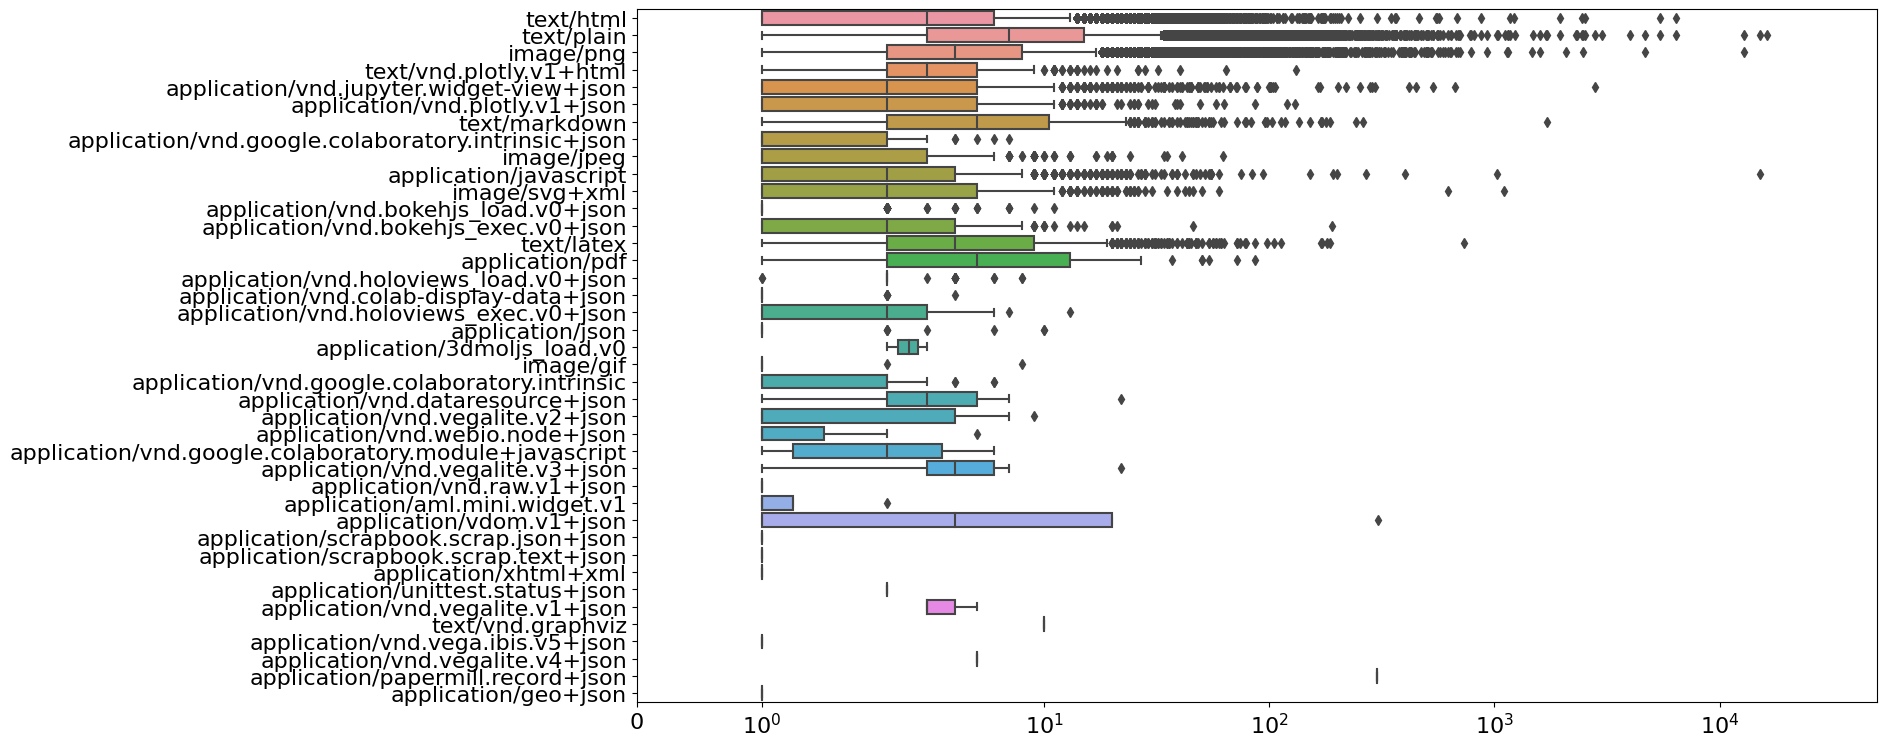

In [30]:
fig, ax = plt.subplots(nrows=1, ncols=1, figsize=(16, 9))
sns.boxplot(data=plottable_df, orient="h", ax=ax)
ax.tick_params(axis='x', rotation=0)
ax.set_xscale('symlog')
ax.set_xlim(0, 50000)
plt.show()

In [31]:
datatable_prints = []
for column_name in chosen_columns[1:]:
    datatable_prints.append([column_name.split('/')[0], column_name.split('/')[1], fdf[column_name].sum()])

ddf = pandas.DataFrame(data=datatable_prints, columns=['Category', 'File Type', 'Total'])
ddf = ddf.sort_values(by=['Total'], ascending=False)
print(ddf.head())

ddf['Total'].sum()

      Category                     File Type      Total
1         text                         plain  1045390.0
2        image                           png   360665.0
0         text                          html   225368.0
9  application                    javascript    24677.0
4  application  vnd.jupyter.widget-view+json    15572.0


1707839.0

In [32]:
fdf['image/png'].sum()

360665.0

In [33]:
fdf = fdf[fdf['application/pdf'] > 0]
fdf[['fileNames', 'application/pdf']]

fileNames  application/pdf
370    23ec9ea059cf075533eb53d8458b648fcbfc635b.ipynb              9.0
901    9a7a4a2f49b3c012845d3609e45ffd39461f76ba.ipynb              2.0
1682   24af985ec28c855dfff0e9a92ebf5d11fa499281.ipynb              8.0
1692   7e20988ce1cd049ac66ab65ec945664d2460fb8c.ipynb              6.0
2149   5247e41d9740e2f5e05b183453a0ba153c6efd92.ipynb              5.0
...                                               ...              ...
95655  75452abe119ebdc1aeb9df93de354ab886453a52.ipynb              1.0
97561  6ba516b8fa9eda5aeb64dd4d9e75fb8242b9e93e.ipynb              8.0
97974  10464359ff2f2f3d83d9438e50a95518210e58de.ipynb              2.0
99901  26dd9468e8229cf9878305638805e7bd8fb44b1d.ipynb              5.0
99982  04d6c954dddd2bd6ec62762939f6761d0c3d2faf.ipynb              1.0

[61 rows x 2 columns]

# Modules used in Notebooks and Function Level Data

In [41]:
imports_used = {}
for index, row in df.iterrows():
    data = row['imports']
    for element in data:
        if element not in imports_used:
            imports_used[element] = 0
        imports_used[element] = imports_used[element] + 1

import_df = pandas.DataFrame(data=[[k, v] for k, v in imports_used.items()], columns=['Imported Module', 'Number of Occurences'])


In [42]:
import_df = import_df.sort_values(by=['Number of Occurences'], ascending=False)
import_df['Imported Module'] = import_df['Imported Module'].str.strip().replace(' ', '.')
import_df

Imported Module  Number of Occurences
6                                                  numpy                 67538
8                                      matplotlib.pyplot                 48074
7                                                 pandas                 46566
2                                                     os                 17075
12                                               seaborn                 15102
...                                                  ...                   ...
22935  chatto_transform.transforms.mimic.bun_transfor...                     1
22934  chatto_transform.transforms.mimic.bun_transfor...                     1
22933  chatto_transform.transforms.mimic.age_transfor...                     1
22932  chatto_transform.transforms.mimic.age_transfor...                     1
42150                            graph_nets.demos models                     1

[42151 rows x 2 columns]

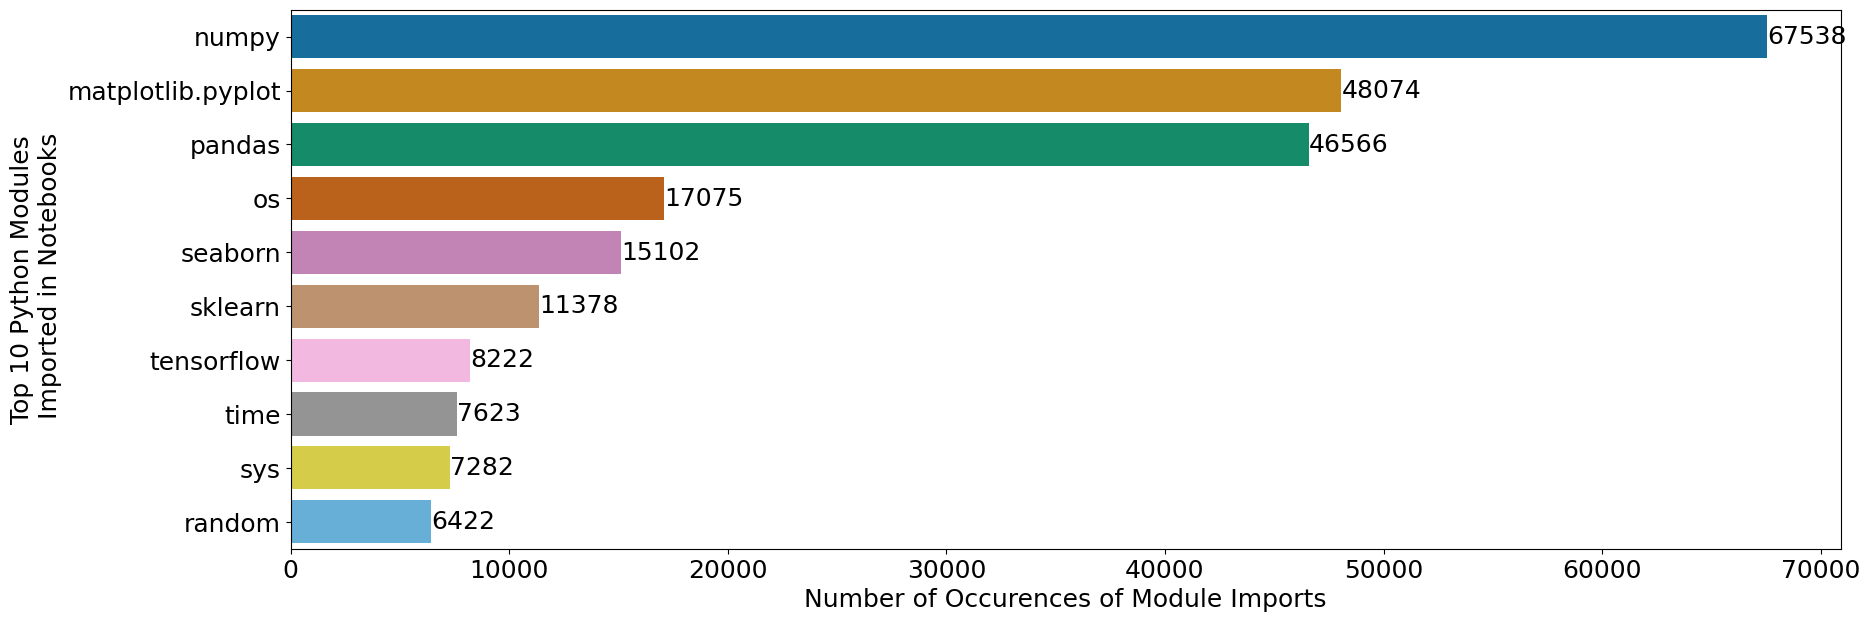

In [148]:
fig, ax = plt.subplots(nrows=1, ncols=1, figsize=(20, 7))
plt.rcParams['font.size'] = 18
top_10_results = import_df[:10]
top_10_results.loc[top_10_results['Imported Module'].str.contains('sklearn.model_selection train_test_split'), 'Imported Module'] = 'sklearn'
sns.barplot(x="Number of Occurences", y="Imported Module", data=top_10_results, ax=ax, palette='colorblind')
ax.bar_label(ax.containers[0])
ax.tick_params(labelsize=18)
ax.set_ylabel('Top 10 Python Modules\n Imported in Notebooks', fontsize=18)
ax.set_xlabel('Number of Occurences of Module Imports', fontsize=18)
plt.savefig('submission-figures/top-10-import-modules.pdf', bbox_inches='tight')

In [45]:
df['num_code_cells'] = df['code_lines'].apply(lambda x: len(x))
print(df['num_code_cells'].max())

723


In [46]:
sorted_df = df.sort_values(by=['num_code_cells'], ascending=True)
sorted_df

fileNames               language  \
26352  70f7bc77cb661c1143a4caab9a1a77952ab6019e.ipynb          Python [Root]   
23106  2c4a59323d67be74d9c5202d195a024fa89511db.ipynb          conda-env-R-r   
79297  851e8bf4adbaad1122ccb57344f47f6fc9f5a041.ipynb          Python [Root]   
79292  d6def3aa43a94207f0e675f581741ef979d13ddf.ipynb  conda-env-dsci6007-py   
23111  dbf657f57da0025f768a339a4830ea1bc34d10c0.ipynb          Python [Root]   
...                                               ...                    ...   
77167  134f130e0ed52f961d8086db5ea565aee1af2b73.ipynb                python3   
73390  69ecea9f34b6ebcf6299adabad403ef57780775c.ipynb                python3   
81548  72667ad2f073fa7925d83afaf7c912a4d27a4cf0.ipynb       pycharm-f3445131   
87115  2614b43966b6de6c2369cbfa4d8e7e2a302ff57b.ipynb                python3   
98467  7a9f712f90ecae957a5de86de998236f031489fc.ipynb                python3   

                                                 imports  num_images  \
26352                                                 []           0   
23106                                                 []           0   
79297                                                 []          59   
79292                                                 []           0   
23111                                                 []           6   
...                                                  ...         ...   
77167  [ pandas,  pandas,  pandas,  pandas,  pandas, ...         468   
73390  [ pandas,  numpy, statsmodels.stats.multicomp ...         458   
81548  [ numpy,  pandas,  matplotlib.pyplot,  matplot...         605   
87115  [ numpy,  matplotlib.pyplot,  numpy, sklearn.l...         138   
98467  [ inspect,  sys,  sys,  itertools, sys getrefc...           0   

                                          image_metadata  has_matplotlib  \
26352                                                 []               0   
23106                                                 []               0   
79297  [text/html, text/plain, text/html, text/plain,...               0   
79292                                                 []               0   
23111  [text/plain, image/png, text/plain, text/plain...               0   
...                                                  ...             ...   
77167  [text/html, text/plain, text/html, text/plain,...               0   
73390  [text/html, text/plain, text/plain, text/plain...               0   
81548  [text/plain, text/plain, text/plain, text/plai...               0   
87115  [image/png, text/plain, text/plain, image/png,...               1   
98467                                                 []               0   

       has_plotly  has_bokeh  \
26352           0          0   
23106           0          0   
79297           0          0   
79292           0          0   
23111           0          0   
...           ...        ...   
77167           0          0   
73390           0          4   
81548           0          0   
87115           0          0   
98467           0          0   

                                              code_lines  total_code_lines  \
26352                                                 []                 0   
23106                                                 []                 0   
79297                                                 []                 0   
79292                                                 []                 0   
23111                                                 []                 0   
...                                                  ...               ...   
77167  [1, 1, 3, 1, 8, 1, 1, 1, 3, 1, 1, 1, 1, 1, 2, ...              1028   
73390  [7, 1, 1, 37, 5, 5, 24, 7, 5, 6, 1, 3, 1, 1, 5...              2404   
81548  [7, 3, 3, 1, 1, 14, 1, 1, 21, 1, 1, 7, 2, 7, 1...              1589   
87115  [2, 8, 4, 1, 1, 3, 3, 4, 2, 7, 2, 7, 1, 1, 1, ...              1880   
98467  [1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, ...      

In [47]:
results = []
max_range = df['num_code_cells'].max()

for i, row in df.iterrows():
    code_cell_line_lengths = row['code_lines']
    remaining_elements = max_range - len(code_cell_line_lengths)
    r = numpy.hstack([numpy.array(code_cell_line_lengths), numpy.zeros([remaining_elements])])
    results.append(r)



In [48]:
print(len(results), len(results[0]))

100000 723


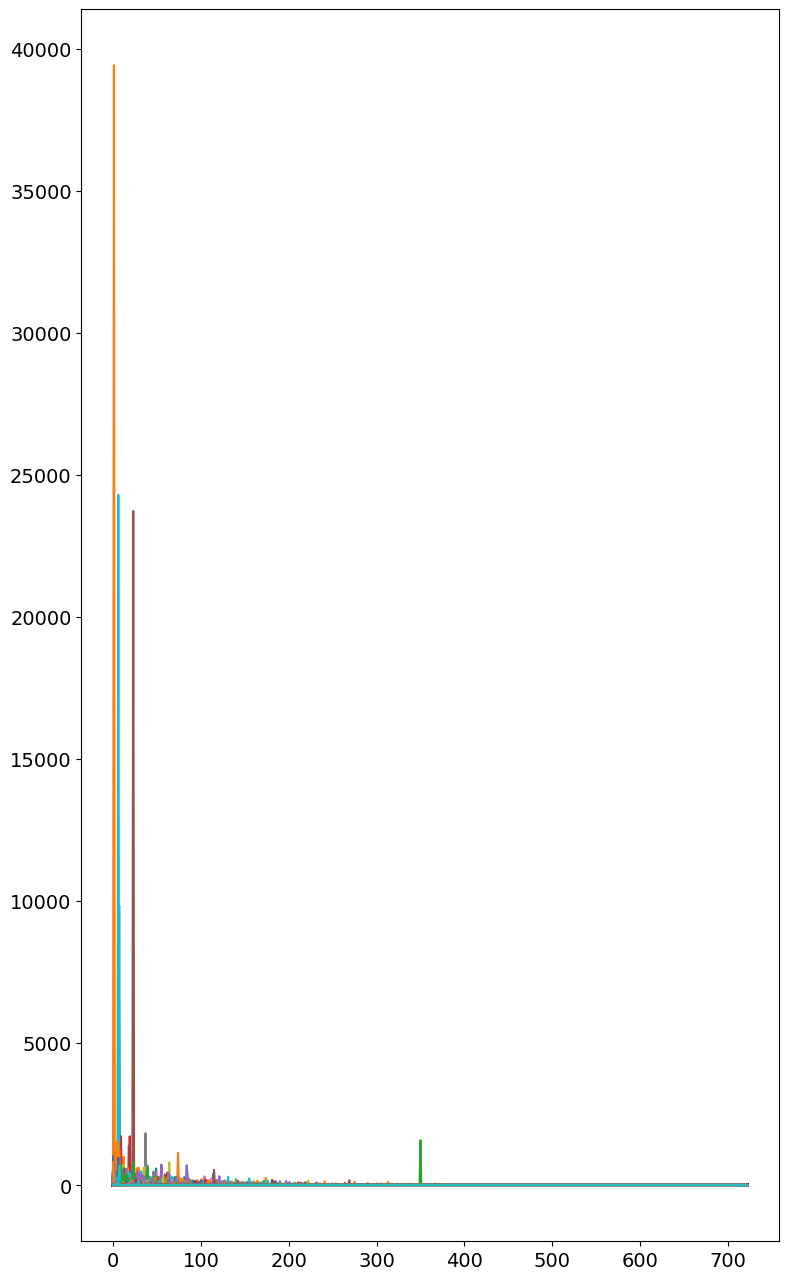

In [49]:
fig, ax = plt.subplots(nrows=1, ncols=1, figsize=(9, 16))
ax.plot(numpy.array(results).T)
plt.show()

# Distribution of the Functions

In [50]:
fcall_df = pandas.read_csv('processed_function_calls.csv', converters={'functionCalls': json.loads})
fcall_df

fileNames             language  \
0      34764addd2e5b1aa62939bd6678decf7d3e705df.ipynb              python3   
1      d65342252111a9ee979858081d7d21639064bc54.ipynb              python3   
2      5356299da5d4f885b530d1dde7045109c00fa972.ipynb              python3   
3      c04f8cace1248b135b75477f2b1bb4269707adc7.ipynb              python3   
4      7744ea88d5b973ef2b73bf53ab1f717f44b461b7.ipynb              python3   
...                                               ...                  ...   
39535  deebd47adf5f42ceca10e07b26e62be323c05e17.ipynb              python2   
39536  da1c307dfcf5e430cbea37186dd42705efa7de56.ipynb              python3   
39537  9a477a114ff950bb7721354979770fb7b6c85ac4.ipynb              python3   
39538  6bc5d894325a307362fad2b98c94f1f47f7984fe.ipynb  conda-env-tf-cpu-py   
39539  bd8dcc64f8eaf4eecc3fb1a49e54d5595e6560a7.ipynb              python3   

                                                 imports  numImages  \
0      ["google.colab drive", " numpy", " pandas", " ...          2   
1      [" matplotlib.pyplot", "skimage color", "skima...          1   
2      [" os", "glob glob", " earthpy.plot", " gdal",...          6   
3      ["data_generator vis_train_features", "IPython...          4   
4      ["keras.optimizers Adam", "keras.optimizers SG...          1   
...                                                  ...        ...   
39535  [" sys", " matplotlib.pyplot", " time", " nump...          3   
39536  ["Portfolio Portfolio", "Portfolio universe", ...          3   
39537  [" time", " numpy", " h5py", " matplotlib.pypl...          5   
39538  [" matplotlib.pyplot", " numpy", " tensorflow"...          1   
39539  ["graph_nets graphs", "graph_nets utils_np", "...          2   

                                           functionCalls  linesOfCode  
0      [drive.mount, os.chdir, ZipFile, z.extractall,...          161  
1      [transform.resize, io.imread, glob.glob, plt.f...           26  
2      [rasterio.Env, profile.update, rasterio.open, ...           99  
3      [vis_train_features, plot_raw_audio, display, ...          274  
4      [K.clear_session, ssd_300, SGD, SSDLoss, model...          244  
...                                                  ...          ...  
39535  [sys.path.append, create_engine, sessionmaker,...          137  
39536  [universe.get_security, Admin, test_admin.sugg...           99  
39537  [np.random.seed, load_data, plt.imshow, print,...          132  
39538  [ops.reset_default_graph, tf.Session, len, req...           61  
39539  [mapSquare.append, mapSquare.append, np.zeros,...          169  

[39540 rows x 6 columns]

In [51]:
fcall_result = {}
for index, row in fcall_df.iterrows():
    calls = row['functionCalls']
    for call in calls:
        if call not in fcall_result:
            fcall_result[call] = 0
        fcall_result[call] = fcall_result[call] + 1

fcall_result_df = pandas.DataFrame(data=[[k, v] for k, v in fcall_result.items()], columns=['Function Call', 'Count'])

In [52]:
fcall_result_df = fcall_result_df.sort_values(by=['Count'], ascending=False)
fcall_result_df

Function Call   Count
11                             print  293133
6                                len  111717
10                             range   93041
420                         plt.plot   70575
108                         plt.show   70454
...                              ...     ...
212147                       jf.read       1
83947      grouped_data.rating.count       1
83946   grouped_data.timestamp.first       1
83945   grouped_data.movieId.nunique       1
364357         alpha_agent_iteration       1

[364358 rows x 2 columns]

In [53]:
top_10_functions = fcall_result_df[:20]
top_10_functions

Function Call   Count
11          print  293133
6             len  111717
10          range   93041
420      plt.plot   70575
108      plt.show   70454
74      plt.title   49998
28            str   48067
97       np.array   46360
68     plt.figure   45797
145    plt.xlabel   42430
146    plt.ylabel   41693
412  pd.DataFrame   32144
4     pd.read_csv   30858
322          list   29387
598    plt.legend   25080
196           int   24251
294     np.arange   23228
14   plt.subplots   22710
73    plt.subplot   21522
43      model.add   21243

In [54]:
mpl_plotly_seaborn = df[['fileNames', 'has_matplotlib', 'has_plotly', 'has_bokeh']]

In [55]:
mpl_plotly_seaborn = mpl_plotly_seaborn.sort_values(by=['has_matplotlib', 'has_plotly', 'has_bokeh'], ascending=[False, False, False])
mpl_plotly_seaborn[['has_matplotlib', 'has_plotly', 'has_bokeh']].sum()

has_matplotlib    27684
has_plotly          510
has_bokeh         18527
dtype: int64

In [115]:
df = pandas.read_csv('nb_processed_cell_html.csv')
df

fileNames  cell_seq_num  \
0        serve/light/107d73eda168b7699d80351e4995937d6a...             0   
1        serve/light/107d73eda168b7699d80351e4995937d6a...             1   
2        serve/light/107d73eda168b7699d80351e4995937d6a...             2   
3        serve/light/107d73eda168b7699d80351e4995937d6a...             3   
4        serve/light/107d73eda168b7699d80351e4995937d6a...             4   
...                                                    ...           ...   
2922297  serve/light/bd38df988bfd731f9094ececb905f0f3ee...            19   
2922298  serve/light/bd38df988bfd731f9094ececb905f0f3ee...            20   
2922299  serve/light/bd38df988bfd731f9094ececb905f0f3ee...            21   
2922300  serve/light/bd38df988bfd731f9094ececb905f0f3ee...            22   
2922301  serve/light/bd38df988bfd731f9094ececb905f0f3ee...            23   

         cellType  _has_output  _no_outputs  _output_contains_graphics  \
0        markdown        False        False                      False   
1        markdown        False        False                      False   
2        markdown        False        False                      False   
3        markdown        False        False                      False   
4        markdown        False        False                      False   
...           ...          ...          ...                        ...   
2922297      code         True        False                      False   
2922298      code         True        False                       True   
2922299      code        False        False                      False   
2922300      code         True        False                       True   
2922301      code        False        False                      False   

         _output_contains_tables  _has_interactive  _has_heading  _has_links  \
0                          False             False         False       False   
1                          False             False         False       False   
2                          False             False          True        True   
3                          False             False          True        True   
4                          False             False          True        True   
...                          ...               ...           ...         ...   
2922297                    False             False         False       False   
2922298                    False             False         False       False   
2922299                    False             False         False       False   
2922300                    False             False         False       False   
2922301                    False             False         False       False   

         ...                                           h1_texts  h2_texts  \
0        ...                                                 []        []   
1        ...                                                 []        []   
2        ...  ["Reinforcement Learning in Azure Machine Lear...        []   
3        ...                                                 []        []   
4        ...                                                 []        []   
...      ...                                                ...       ...   
2922297  ...                                                 []        []   
2922298  ...                                                 []        []   
2922299  ...                                                 []        []   
2922300  ...                                                 []        []   
2922301  ...                                                 []        []   

                     h3_texts  h4_texts  h5_texts  h6_texts  has_tables  \
0                          []        []        []        []       False   
1                          []        []        []        []       False   
2                          []        []        []        []       False   
3        ["Cartpole problem"]        []        []        []  

In [130]:
alt_items = df[(df['_output_contains_graphics'] == True) & (df['alt_text'] != '[]')]

In [139]:
alt_items['alt_count'] = alt_items['alt_text'].apply(lambda x: len(list(filter(None, json.loads(x)))))
alt_items

/tmp/ipykernel_186946/1966416462.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  alt_items['alt_count'] = alt_items['alt_text'].apply(lambda x: len(list(filter(None, json.loads(x)))))


fileNames  \
694670   serve/light/36f17428463ea6a6a75d9e064713a3039f381037.html   
787402   serve/light/f688a5d68fe3d107eca2721dee835b0c33fa1897.html   
787404   serve/light/f688a5d68fe3d107eca2721dee835b0c33fa1897.html   
787406   serve/light/f688a5d68fe3d107eca2721dee835b0c33fa1897.html   
787409   serve/light/f688a5d68fe3d107eca2721dee835b0c33fa1897.html   
...                                                            ...   
2414434  serve/light/9177721add27f1d14d157f0367f63c023a597f07.html   
2414437  serve/light/9177721add27f1d14d157f0367f63c023a597f07.html   
2557924  serve/light/6e7de0c0f3db2c8fb61120d9c3aa0a7c944292d4.html   
2558013  serve/light/6e7de0c0f3db2c8fb61120d9c3aa0a7c944292d4.html   
2592289  serve/light/ba6fed41e78da0d7ac337313a03f6e37d1316add.html   

         cell_seq_num  cellType  _has_output  _no_outputs  \
694670              0      code         True        False   
787402              0  markdown        False        False   
787404              2  markdown        False        False   
787406              4  markdown        False        False   
787409              7  markdown        False        False   
...               ...       ...          ...          ...   
2414434            44  markdown        False        False   
2414437            47  markdown        False        False   
2557924             4  markdown        False        False   
2558013            93  markdown        False        False   
2592289            24  markdown        False        False   

         _output_contains_graphics  _output_contains_tables  _has_interactive  \
694670                        True                    False             False   
787402                        True                    False             False   
787404                        True                    False             False   
787406                        True                    False             False   
787409                        True                    False             False   
...                            ...                      ...               ...   
2414434                       True                    False             False   
2414437                       True                    False             False   
2557924                       True                    False             False   
2558013                       True                    False             False   
2592289                       True                    False             False   

         _has_heading  _has_links  ...  \
694670           True       False  ...   
787402           True        True  ...   
787404           True        True  ...   
787406           True        True  ...   
787409           True        True  ...   
...               ...         ...  ...   
2414434          True        True  ...   
2414437          True        True  ...   
2557924          True        True  ...   
2558013          True        True  ...   
2592289          True        True  ...   

                                                                       h2_texts  \
694670                                                                       []   
787402               ["Carguemos en un pandas dataframe nuestra base de datos"]   
787404               ["Carguemos en un pandas dataframe nuestra base de datos"]   
787406               ["Carguemos en un pandas dataframe nuestra base de datos"]   
787409               ["Carguemos en un pandas dataframe nuestra base de datos"]   
...                                                                         ...   
2414434  ["Piecewise interpolation", "Least squares approximation", "Appendix"]   
2414437  ["Piecewise interpolation", "Least squares approximation", "Appendix"]   
2557924           ["Table of contents", "Visualization", "Want to learn more?"]   
2558013                                ["Visualization", "Want to learn more?"]   
2592289                         ["3 Linear regression with multiple variables"]   

        

In [140]:
alt_items['alt_count'].sum()

609

In [144]:
alt_items[['cellType', 'alt_count']].groupby('cellType').agg('sum')

alt_count
cellType           
code              1
markdown        608